In [1]:
import sys
import numpy as np
import pandas as pd

from Dissects.io import (load_NDskl, 
                         load_image,
                         load_skeleton,
                         save_skeleton,
                         save_fits
                        )
from Dissects.image import z_project
from Dissects.geometry import Skeleton
from Dissects.segmentation.seg_2D import (segmentation, 
                                          junction_around_cell)
from Dissects.analysis.analysis import (general_analysis,
                              cellstats
                              )

%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load image
image, metadata = load_image("/home/tmerle/DISSECT/TestPICS/L01mixte/t0/im1-t0.tif")


In [3]:
metadata

{'pixel_ratio': 0.19842053287421468, 'height': 525, 'width': 186}

In [4]:
pixel_ratio = metadata['pixel_ratio']

In [5]:
pixel_ratio

0.19842053287421468

In [6]:
#load ndskl file 
cp, fil, point, specs = load_NDskl('/home/tmerle/DISSECT/TestPICS/L01mixte/t0/im1-t0.fits'+'_c'+'30'+'.up.NDskl.a.NDskl')
#create skeleton object
skel = Skeleton(cp, fil, point, specs)


/home/tmerle/anaconda3/envs/opencv-env/lib/python3.7/site-packages/Dissects-0.0.1-py3.7.egg/Dissects/geometry/skeleton.py:25: UserWarning: Has pixel can be half pixel from DisPerSE output,                   we take the integer part of xyz values. 
  we take the integer part of xyz values. ")


In [7]:
path='/home/tmerle/DISSECT/TestPICS/L01mixte/t0/im1-t0.tif'
imfile = load_image(path)

In [8]:
imfile

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 {'pixel_ratio': 0.19842053287421468, 'height': 525, 'width': 186})

In [9]:
image = imfile[0]

In [10]:
Skel1 = fits.getdata('/home/tmerle/DISSECT/TestPICS/L01mixte/t0/im1-t0.fits'+'_c'+'30'+'.up.NDskl.fits')
#skeleton = load_NDskl('/home/tmerle/DISSECT/TestPICS/L01mixte/t0/im1-t0.fits'+'_c'+'30'+'.up.NDskl.a.NDskl')

NameError: name 'fits' is not defined

In [ ]:
# Load skeleton
#data = load_skeleton('2d_skeleton.hf5')
#skel = Skeleton(data['critical_point'], data['filament'], data['point'])

In [ ]:
#Clean skeleton
skel.remove_lonely_cp()
skel.remove_free_filament()

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(image)
plt.scatter(skel.critical_point.loc[skel.filament.loc[0].cp1]['x'],
            skel.critical_point.loc[skel.filament.loc[0].cp1]['y'],
            color='red', s=2)
plt.scatter(skel.critical_point.loc[skel.filament.loc[0].cp2]['x'],
            skel.critical_point.loc[skel.filament.loc[0].cp2]['y'],
            color='red', s=2)

plt.figure(figsize=(7,7))
plt.imshow(image)
plt.scatter(skel.point[skel.point['filament']==0]['x'],
            skel.point[skel.point['filament']==0]['y'],
            color='red', s=2)
    
    

In [ ]:
skel.specs = specs
mask_inv = skel.create_binary_image()

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(mask_inv, origin='lower')
plt.title('mask_inv')
mask_inv = mask_inv.astype(int)

mask = ((~mask_inv.astype(bool)).astype(int))
plt.figure(figsize=(7,7))
plt.imshow(mask, origin='lower')
plt.title('mask')
mask = mask.astype(int)

In [ ]:
plt.figure(figsize=(7,7))
ax1 = plt.subplot(2,1,1)
ax1.imshow(image, origin='lower')
ax1.set_title('image')
ax2 = plt.subplot(2,1,2,sharex=ax1,sharey=ax1)
ax2.imshow(mask, origin='lower')
ax2.set_title('mask')


In [ ]:
from Dissects.image import dilation
# elargissement
mask_dilation = dilation(mask, 1)
plt.figure(figsize=(7,7))
plt.imshow(mask_dilation, origin='lower')
plt.title('mask_dilation')

mask_inv_dilation = (~mask_dilation.astype(bool)).astype(int)
plt.figure(figsize=(7,7))
plt.imshow(mask_inv_dilation,origin='lower')
plt.title('mask_inv_dilation')



In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, origin='lower')
y,x = np.where(mask_dilation != 0)
ax.scatter(x,y, alpha=0.2, s=2, color='white')
plt.title('Masque Dilation + image original')

In [ ]:
# Background
plt.figure()
plt.imshow(mask_inv_dilation * image, origin='lower')
plt.title('background signal')


#Junction
plt.figure()
plt.imshow(mask_dilation*image, origin='lower')
plt.title('Junctional signal')


In [ ]:
#from Dissects.analysis import general_analysis
print('mean background =',general_analysis(image, mask_dilation)[0], ',',
      'std =', general_analysis(image, mask_dilation)[1])

print('mean junctional signal=',general_analysis(image, mask_dilation)[2], ',',
      'std =', general_analysis(image, mask_dilation)[3])


In [ ]:
%matplotlib notebook

# Segmentation


In [ ]:
seg = segmentation(mask, 10)

In [ ]:
from matplotlib.colors import ListedColormap
rand = np.random.rand(256,3)
rand[0] = 0
cmap_rand = ListedColormap(rand)


plt.figure(figsize=(9,10))
ax1 = plt.subplot(2,1,1)
ax1.imshow(mask, origin='lower')
ax1.set_title('mask')
ax2 = plt.subplot(2,1,2,sharex=ax1,sharey=ax1)
ax2.imshow(seg, cmap=cmap_rand, origin='lower')
ax2.set_title('seg')

In [ ]:
junc_particular = junction_around_cell(mask, seg, 151)

plt.figure()
plt.imshow(junc_particular, origin='lower')
plt.title('junc_particular')

In [ ]:
df_alphacat=cellstats(image, mask, 1, seg, 'alpha-cat', 1/pixel_ratio)

In [ ]:
df_alphacat

# Vertices méthode Tatiana 



In [266]:
seg0 = segmentation(mask, 0)
seg1 = segmentation(mask, 1)
seg1 = segmentation(mask, 2)

Text(0.5, 1.0, 'mask')

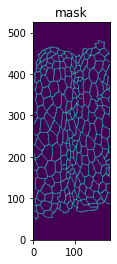

In [267]:
import cv2
plt.figure()
plt.imshow(mask, origin='lower')
plt.title('mask')

In [268]:
kernel = np.ones((2,2),np.uint8)

erosion = cv2.erode(mask.astype(np.uint8), kernel, iterations = 1)
new_mask= mask - erosion

'''
newnew_mask = cv2.morphologyEx(new_mask.astype(np.uint16), cv2.MORPH_CLOSE, kernel_1)
erosion2 = cv2.erode(newnew_mask , kernel, iterations = 1)
newnew_mask= newnew_mask - erosion2
'''

'\nnewnew_mask = cv2.morphologyEx(new_mask.astype(np.uint16), cv2.MORPH_CLOSE, kernel_1)\nerosion2 = cv2.erode(newnew_mask , kernel, iterations = 1)\nnewnew_mask= newnew_mask - erosion2\n'

Text(0.5, 1.0, 'new_mask')

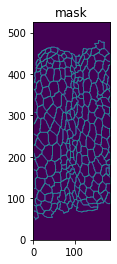

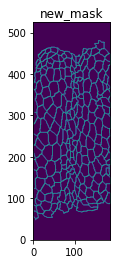

In [269]:
plt.figure()
plt.imshow(new_mask, origin='lower')
plt.title('mask')

plt.figure()
plt.imshow(new_mask, origin='lower')
plt.title('new_mask')


Text(0.5, 1.0, 'seg2')

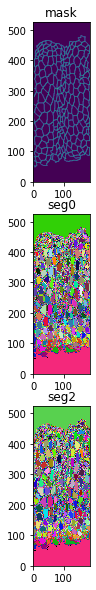

In [270]:
seg0 = segmentation(new_mask, 0)
seg1 = segmentation(new_mask, 1)
seg2 = segmentation(mask, 2)


from matplotlib.colors import ListedColormap
rand = np.random.rand(256,3)
rand[0] = 0
cmap_rand = ListedColormap(rand)


plt.figure(figsize=(9,10))
ax1 = plt.subplot(3,1,1)
ax1.imshow(mask, origin='lower')
ax1.set_title('mask')

ax2 = plt.subplot(3,1,2,sharex=ax1,sharey=ax1)
ax2.imshow(seg0, cmap=cmap_rand, origin='lower')
ax2.set_title('seg0')

ax3 = plt.subplot(3,1,3,sharex=ax1,sharey=ax1)
ax3.imshow(seg2, cmap=cmap_rand, origin='lower')
ax3.set_title('seg2')

In [271]:
image_final = np.zeros_like(mask)

for i in range(1, np.unique(seg0)[-1]+1):
    image_cell_mask_i = np.zeros_like(mask)
    image_cell_mask_i[np.where(seg0 == i)] = 1
    seg_dilate_i = dilation(image_cell_mask_i, 1)
   
    image_final = image_final + seg_dilate_i
    

    
    

Text(0.5, 1.0, 'image_final')

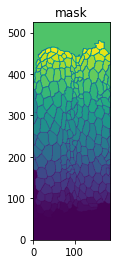

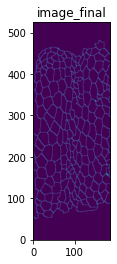

In [272]:
plt.figure()
plt.imshow(seg0, origin='lower')
plt.title('mask')

plt.figure()
plt.imshow(image_final, origin='lower')
plt.title('image_final')

Text(0.5, 1.0, 'image_final')

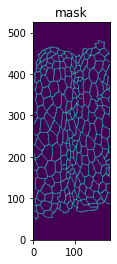

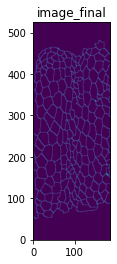

In [273]:
plt.figure()
plt.imshow(mask, origin='lower')
plt.title('mask')

plt.figure()
plt.imshow(image_final, origin='lower')
plt.title('image_final')

Text(0.5, 1.0, 'image_final')

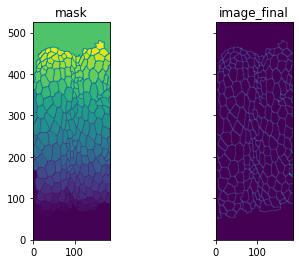

In [274]:
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True)
ax1.imshow(seg0, origin='lower')
ax1.set_title('mask')

ax2.imshow(image_final, origin='lower')
ax2.set_title('image_final')

In [275]:
image_vertex = np.zeros_like(mask)

for i in range(1, np.unique(seg0)[-1]+1):
    
    
    image_cell_mask_i = np.zeros_like(mask)
    image_cell_mask_i[np.where(seg0 == i)] = 1
    seg_dilate_i = dilation(image_cell_mask_i, 1)
    
   
    image_vertex = image_vertex + seg_dilate_i
    


Text(0.5, 1.0, 'image_vertex')

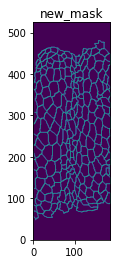

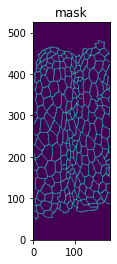

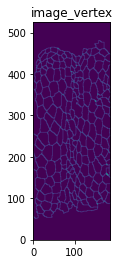

In [276]:
plt.figure()
plt.imshow(new_mask, origin='lower')
plt.title('new_mask')

plt.figure()
plt.imshow(mask, origin='lower')
plt.title('mask')

plt.figure()
plt.imshow(image_vertex, origin='lower')
plt.title('image_vertex')

In [277]:
#Récupération des vextex 'simples'
vertices = np.where(image_vertex>=3)

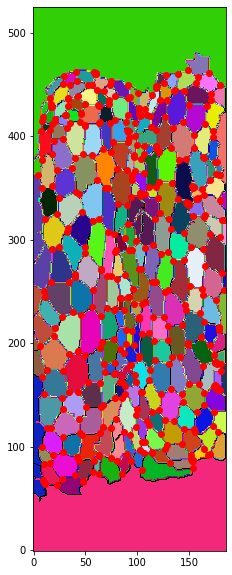

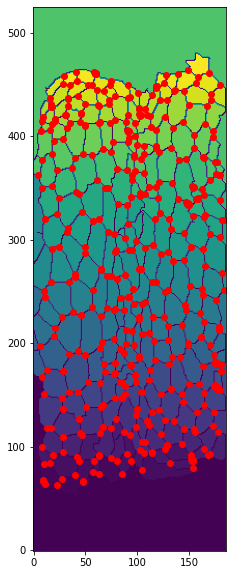

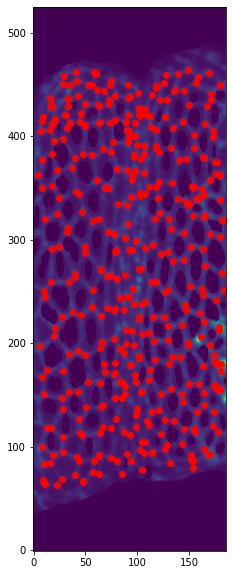

In [278]:
plt.figure(figsize=(10,10))
#plt.imshow(seg, origin='lower',cmap='gist_gray')
plt.imshow(seg0, cmap=cmap_rand, origin='lower')
ax.set_aspect('equal')
plt.scatter(vertices[1], vertices[0], color='r')

plt.figure(figsize=(10,10))
#plt.imshow(seg, origin='lower',cmap='gist_gray')
plt.imshow(seg0, origin='lower')
ax.set_aspect('equal')
plt.scatter(vertices[1], vertices[0], color='r')

plt.figure(figsize=(10,10))
#plt.imshow(seg, origin='lower',cmap='gist_gray')
plt.imshow(image, origin='lower')
ax.set_aspect('equal')
plt.scatter(vertices[1], vertices[0], color='r')

In [279]:
columns_name = ['x_0',
                'y_0',
                'Cell_1',
                'Cell_2',
                'Cell_3',
                'Cell_4',
                'Cell_5']
nb_vertices = len(vertices[0])
init = np.zeros((nb_vertices , len(columns_name)))

df_vertices = pd.DataFrame(data=init, columns=columns_name)

for v in range(0, len(vertices[0])):
    df_vertices.loc[v]['x_0'] = vertices[0][v]
    df_vertices.loc[v]['y_0'] = vertices[1][v]

    carre = seg0[vertices[0][v]-3 : vertices[0][v]+4, vertices[1][v]-3 : vertices[1][v]+4]
    cells = np.unique(carre)
    
    df_vertices.loc[v]['Cell_1'] = cells[1]
    df_vertices.loc[v]['Cell_2'] = cells[2]
    df_vertices.loc[v]['Cell_3'] = cells[3]
    
    if len(np.unique(carre)) == 4 :
        df_vertices.loc[v]['Cell_4'] = 'Nan'
        df_vertices.loc[v]['Cell_5'] = 'Nan'
    if len(np.unique(carre)) == 5 :
        df_vertices.loc[v]['Cell_4'] = cells[4]
        df_vertices.loc[v]['Cell_5'] = 'Nan'
    if len(np.unique(carre)) == 6 :
        df_vertices.loc[v]['Cell_4'] = cells[4]
        df_vertices.loc[v]['Cell_5'] = cells[5]


    

In [280]:
v

449

In [281]:
v=123
df_vertices.loc[v]['x_0'] = vertices[0][v]
df_vertices.loc[v]['y_0'] = vertices[1][v]

carre = seg2[vertices[0][v]-3 : vertices[0][v]+4, vertices[1][v]-3 : vertices[1][v]+4]
nbcells = np.unique(carre)


In [282]:
carre

array([[69,  0, 53, 53, 53, 53, 53],
       [69,  0,  0, 53, 53, 53,  0],
       [69, 69,  0, 53, 53,  0, 72],
       [69, 69,  0,  0,  0, 72, 72],
       [69, 69, 69,  0, 72, 72, 72],
       [69, 69,  0, 72, 72, 72, 72],
       [69, 69,  0, 72, 72, 72, 72]], dtype=int32)

In [283]:
pd.set_option('display.max_rows', None)
df_vertices

x_0    y_0  Cell_1  Cell_2  Cell_3  Cell_4  Cell_5
0     63.0   23.0     1.0     3.0     4.0     NaN     NaN
1     64.0   11.0     1.0     2.0     4.0     6.0     NaN
2     66.0   10.0     1.0     2.0     4.0     6.0     NaN
3     66.0   48.0     1.0     3.0     7.0     NaN     NaN
4     67.0    9.0     2.0     4.0     6.0     NaN     NaN
5     67.0   48.0     1.0     3.0     7.0     NaN     NaN
6     68.0    9.0     2.0     4.0     6.0     NaN     NaN
7     69.0   27.0     3.0     4.0     9.0     NaN     NaN
8     73.0   40.0     3.0     7.0     9.0     NaN     NaN
9     74.0   63.0     1.0     5.0    10.0     NaN     NaN
10    74.0   85.0     1.0     5.0    11.0     NaN     NaN
11    76.0   57.0     1.0     7.0    10.0     NaN     NaN
12    78.0  105.0     1.0     8.0    12.0     NaN     NaN
13    79.0  154.0     1.0     8.0    13.0     NaN     NaN
14    83.0   10.0     2.0     4.0    14.0     NaN     NaN
15    84.0   16.0     4.0     9.0    14.0     NaN     NaN
16    84.0  132.0     8.0    13.0    15.0     NaN     NaN
17    86.0   44.0     7.0     9.0    16.0     NaN     NaN
18    86.0   58.0     7.0    10.0    16.0     NaN     NaN
19    86.0   81.0     5.0    11.0    17.0     NaN     NaN
20    86.0   94.0     1.0    11.0    12.0     NaN     NaN
21    86.0  153.0     1.0    13.0    18.0    19.0     NaN
22    86.0  154.0     1.0    13.0    18.0    19.0     NaN
23    87.0  153.0     1.0    13.0    18.0    19.0     NaN
24    87.0  154.0     1.0    13.0    18.0    19.0     NaN
25    88.0  152.0     1.0    13.0    18.0    19.0     NaN
26    89.0   75.0     5.0    17.0    21.0     NaN     NaN
27    90.0   42.0     9.0    16.0    22.0     NaN     NaN
28    91.0   63.0     5.0    10.0    16.0    21.0     NaN
29    92.0   19.0     9.0    14.0    23.0     NaN     NaN
30    92.0   63.0     5.0    10.0    16.0    21.0     NaN
31    92.0  152.0    13.0    19.0    24.0     NaN     NaN
32    92.0  168.0     1.0    19.0    20.0    25.0     NaN
33    93.0   90.0    11.0    12.0    17.0     NaN     NaN
34    93.0  170.0     1.0    19.0    20.0    25.0     NaN
35    94.0  107.0     8.0    12.0    26.0     NaN     NaN
36    94.0  114.0     8.0    15.0    26.0    27.0     NaN
37    95.0   28.0     9.0    22.0    23.0     NaN     NaN
38    95.0  114.0     8.0    15.0    26.0    27.0     NaN
39    97.0  103.0    12.0    26.0    28.0     NaN     NaN
40    98.0  127.0    13.0    15.0    27.0     NaN     NaN
41    98.0  165.0    19.0    24.0    25.0     NaN     NaN
42   100.0    8.0     2.0    14.0    23.0     NaN     NaN
43   102.0  129.0    13.0    27.0    29.0     NaN     NaN
44   103.0  143.0    13.0    24.0    29.0     NaN     NaN
45   105.0  105.0    26.0    28.0    30.0     NaN     NaN
46   105.0  108.0    26.0    27.0    30.0     NaN     NaN
47   109.0   28.0    22.0    23.0    31.0     NaN     NaN
48   111.0   47.0    16.0    22.0    31.0    32.0     NaN
49   111.0   93.0    12.0    28.0    33.0     NaN     NaN
50   112.0  123.0    27.0    29.0    34.0     NaN     NaN
51   113.0   45.0    16.0    22.0    31.0    32.0     NaN
52   113.0   64.0    16.0    21.0    32.0     NaN     NaN
53   114.0   87.0    12.0    17.0    33.0     NaN     NaN
54   114.0  156.0    24.0    25.0    35.0     NaN     NaN
55   114.0  178.0    20.0    25.0    36.0     NaN     NaN
56   117.0  145.0    24.0    29.0    37.0     NaN     NaN
57   117.0  155.0    24.0    35.0    37.0     NaN     NaN
58   118.0   13.0     2.0    23.0    38.0     NaN     NaN
59   118.0   17.0    23.0    31.0    38.0     NaN     NaN
60   118.0   75.0    17.0    21.0    39.0     NaN     NaN
61   119.0   67.0    21.0    32.0    39.0     NaN     NaN
62   119.0   99.0    28.0    30.0    33.0     NaN     NaN
63   120.0  173.0    25.0    35.0    36.0     NaN     NaN
64   121.0  111.0    27.0    30.0    34.0     NaN     NaN
65   125.0  110.0    30.0    34.0    40.0     NaN     NaN
66   125.0  136.0    29.0    37.0    41.0     NaN     NaN
67   126.0  127.0    29.0    34.0    41.0     NaN     NaN
68   

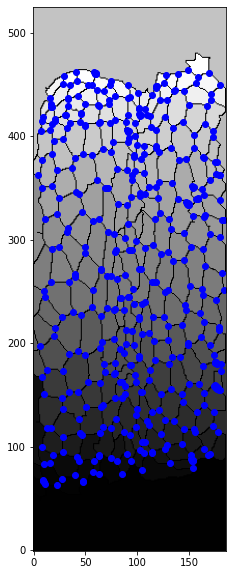

In [284]:
plt.figure(figsize=(10,10))
plt.imshow(seg2, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(df_vertices['y_0'], df_vertices['x_0'], color='b')

In [285]:
#
ind = 0
while ind < len(df_vertices) :
    #print(df_vertices.shape[0])
    cells_ind = np.array([df_vertices['Cell_1'].iloc[ind], 
                          df_vertices['Cell_2'].iloc[ind], 
                          df_vertices['Cell_3'].iloc[ind],
                          df_vertices['Cell_4'].iloc[ind],
                          df_vertices['Cell_5'].iloc[ind]])
    

    liste_x0 = [df_vertices['x_0'].iloc[ind]]
    liste_y0 = [df_vertices['y_0'].iloc[ind]]
    liste_i = []
    liste_cellsi = [cells_ind]
    
    
    for i in range(ind+1, len(df_vertices)):
        
        cells_i = np.array([df_vertices['Cell_1'].iloc[i],
                            df_vertices['Cell_2'].iloc[i], 
                            df_vertices['Cell_3'].iloc[i],
                            df_vertices['Cell_4'].iloc[i],
                            df_vertices['Cell_5'].iloc[i]])
        

        mask_TrueFalse = np.isin(cells_ind, cells_i)
        
        if np.sum(mask_TrueFalse) >= 3 :
            liste_cellsi.append(cells_i)
            liste_i.append(df_vertices.axes[0][i])
            liste_x0.append(df_vertices['x_0'].iloc[i])
            liste_y0.append(df_vertices['y_0'].iloc[i])
            
    
    df_vertices['x_0'].iloc[ind]=int(np.round(np.mean(liste_x0)))
    df_vertices['y_0'].iloc[ind]=int(np.round(np.mean(liste_y0)))
    
    ucells = np.unique(liste_cellsi)
    
    df_vertices['Cell_1'].iloc[ind] = ucells[0] 
    df_vertices['Cell_2'].iloc[ind] = ucells[1] 
    df_vertices['Cell_3'].iloc[ind] = ucells[2] 
    df_vertices['Cell_4'].iloc[ind] = ucells[3] 
    df_vertices['Cell_5'].iloc[ind] = ucells[4] 
    
    #print(liste_i)
    df_vertices=df_vertices.drop(liste_i)
    
    ind+=1

In [286]:
df_vertices

x_0    y_0  Cell_1  Cell_2  Cell_3  Cell_4  Cell_5
0     63.0   23.0     1.0     3.0     4.0     NaN     NaN
1     66.0   10.0     1.0     2.0     4.0     6.0     NaN
3     66.0   48.0     1.0     3.0     7.0     NaN     NaN
7     69.0   27.0     3.0     4.0     9.0     NaN     NaN
8     73.0   40.0     3.0     7.0     9.0     NaN     NaN
9     74.0   63.0     1.0     5.0    10.0     NaN     NaN
10    74.0   85.0     1.0     5.0    11.0     NaN     NaN
11    76.0   57.0     1.0     7.0    10.0     NaN     NaN
12    78.0  105.0     1.0     8.0    12.0     NaN     NaN
13    79.0  154.0     1.0     8.0    13.0     NaN     NaN
14    83.0   10.0     2.0     4.0    14.0     NaN     NaN
15    84.0   16.0     4.0     9.0    14.0     NaN     NaN
16    84.0  132.0     8.0    13.0    15.0     NaN     NaN
17    86.0   44.0     7.0     9.0    16.0     NaN     NaN
18    86.0   58.0     7.0    10.0    16.0     NaN     NaN
19    86.0   81.0     5.0    11.0    17.0     NaN     NaN
20    86.0   94.0     1.0    11.0    12.0     NaN     NaN
21    87.0  153.0     1.0    13.0    18.0    19.0     NaN
26    89.0   75.0     5.0    17.0    21.0     NaN     NaN
27    90.0   42.0     9.0    16.0    22.0     NaN     NaN
28    92.0   63.0     5.0    10.0    16.0    21.0     NaN
29    92.0   19.0     9.0    14.0    23.0     NaN     NaN
31    92.0  152.0    13.0    19.0    24.0     NaN     NaN
32    92.0  169.0     1.0    19.0    20.0    25.0     NaN
33    93.0   90.0    11.0    12.0    17.0     NaN     NaN
35    94.0  107.0     8.0    12.0    26.0     NaN     NaN
36    94.0  114.0     8.0    15.0    26.0    27.0     NaN
37    95.0   28.0     9.0    22.0    23.0     NaN     NaN
39    97.0  103.0    12.0    26.0    28.0     NaN     NaN
40    98.0  127.0    13.0    15.0    27.0     NaN     NaN
41    98.0  165.0    19.0    24.0    25.0     NaN     NaN
42   100.0    8.0     2.0    14.0    23.0     NaN     NaN
43   102.0  129.0    13.0    27.0    29.0     NaN     NaN
44   103.0  143.0    13.0    24.0    29.0     NaN     NaN
45   105.0  105.0    26.0    28.0    30.0     NaN     NaN
46   105.0  108.0    26.0    27.0    30.0     NaN     NaN
47   109.0   28.0    22.0    23.0    31.0     NaN     NaN
48   112.0   46.0    16.0    22.0    31.0    32.0     NaN
49   111.0   93.0    12.0    28.0    33.0     NaN     NaN
50   112.0  123.0    27.0    29.0    34.0     NaN     NaN
52   113.0   64.0    16.0    21.0    32.0     NaN     NaN
53   114.0   87.0    12.0    17.0    33.0     NaN     NaN
54   114.0  156.0    24.0    25.0    35.0     NaN     NaN
55   114.0  178.0    20.0    25.0    36.0     NaN     NaN
56   117.0  145.0    24.0    29.0    37.0     NaN     NaN
57   117.0  155.0    24.0    35.0    37.0     NaN     NaN
58   118.0   13.0     2.0    23.0    38.0     NaN     NaN
59   118.0   17.0    23.0    31.0    38.0     NaN     NaN
60   118.0   75.0    17.0    21.0    39.0     NaN     NaN
61   119.0   67.0    21.0    32.0    39.0     NaN     NaN
62   119.0   99.0    28.0    30.0    33.0     NaN     NaN
63   120.0  173.0    25.0    35.0    36.0     NaN     NaN
64   121.0  111.0    27.0    30.0    34.0     NaN     NaN
65   125.0  110.0    30.0    34.0    40.0     NaN     NaN
66   125.0  136.0    29.0    37.0    41.0     NaN     NaN
67   126.0  127.0    29.0    34.0    41.0     NaN     NaN
68   127.0   44.0    31.0    32.0    42.0     NaN     NaN
69   127.0   80.0    17.0    33.0    39.0     NaN     NaN
70   131.0   99.0    30.0    33.0    40.0     NaN     NaN
71   134.0  114.0    34.0    40.0    43.0     NaN     NaN
72   134.0  158.0    35.0    37.0    44.0     NaN     NaN
73   134.0  174.0    35.0    36.0    45.0     NaN     NaN
74   135.0  121.0    34.0    41.0    43.0     NaN     NaN
75   136.0   28.0    31.0    38.0    42.0     NaN     NaN
76   136.0  100.0    33.0    40.0    46.0     NaN     NaN
77   138.0   51.0    32.0    42.0    47.0     NaN     NaN
78   139.0   66.0    32.0    39.0    47.0    48.0     NaN
80   140.0  165.0    35.0    44.0    45.0     NaN     NaN
81   

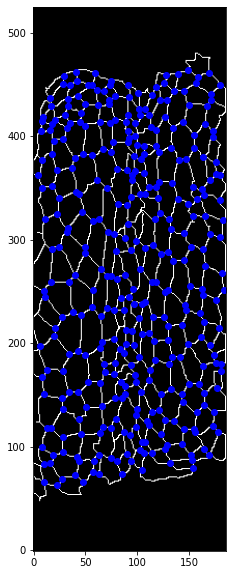

In [287]:
plt.figure(figsize=(10,10))
plt.imshow(mask, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(df_vertices['y_0'], df_vertices['x_0'], color='b')

In [288]:
pd.set_option('display.max_rows', None)
df_vertices

x_0    y_0  Cell_1  Cell_2  Cell_3  Cell_4  Cell_5
0     63.0   23.0     1.0     3.0     4.0     NaN     NaN
1     66.0   10.0     1.0     2.0     4.0     6.0     NaN
3     66.0   48.0     1.0     3.0     7.0     NaN     NaN
7     69.0   27.0     3.0     4.0     9.0     NaN     NaN
8     73.0   40.0     3.0     7.0     9.0     NaN     NaN
9     74.0   63.0     1.0     5.0    10.0     NaN     NaN
10    74.0   85.0     1.0     5.0    11.0     NaN     NaN
11    76.0   57.0     1.0     7.0    10.0     NaN     NaN
12    78.0  105.0     1.0     8.0    12.0     NaN     NaN
13    79.0  154.0     1.0     8.0    13.0     NaN     NaN
14    83.0   10.0     2.0     4.0    14.0     NaN     NaN
15    84.0   16.0     4.0     9.0    14.0     NaN     NaN
16    84.0  132.0     8.0    13.0    15.0     NaN     NaN
17    86.0   44.0     7.0     9.0    16.0     NaN     NaN
18    86.0   58.0     7.0    10.0    16.0     NaN     NaN
19    86.0   81.0     5.0    11.0    17.0     NaN     NaN
20    86.0   94.0     1.0    11.0    12.0     NaN     NaN
21    87.0  153.0     1.0    13.0    18.0    19.0     NaN
26    89.0   75.0     5.0    17.0    21.0     NaN     NaN
27    90.0   42.0     9.0    16.0    22.0     NaN     NaN
28    92.0   63.0     5.0    10.0    16.0    21.0     NaN
29    92.0   19.0     9.0    14.0    23.0     NaN     NaN
31    92.0  152.0    13.0    19.0    24.0     NaN     NaN
32    92.0  169.0     1.0    19.0    20.0    25.0     NaN
33    93.0   90.0    11.0    12.0    17.0     NaN     NaN
35    94.0  107.0     8.0    12.0    26.0     NaN     NaN
36    94.0  114.0     8.0    15.0    26.0    27.0     NaN
37    95.0   28.0     9.0    22.0    23.0     NaN     NaN
39    97.0  103.0    12.0    26.0    28.0     NaN     NaN
40    98.0  127.0    13.0    15.0    27.0     NaN     NaN
41    98.0  165.0    19.0    24.0    25.0     NaN     NaN
42   100.0    8.0     2.0    14.0    23.0     NaN     NaN
43   102.0  129.0    13.0    27.0    29.0     NaN     NaN
44   103.0  143.0    13.0    24.0    29.0     NaN     NaN
45   105.0  105.0    26.0    28.0    30.0     NaN     NaN
46   105.0  108.0    26.0    27.0    30.0     NaN     NaN
47   109.0   28.0    22.0    23.0    31.0     NaN     NaN
48   112.0   46.0    16.0    22.0    31.0    32.0     NaN
49   111.0   93.0    12.0    28.0    33.0     NaN     NaN
50   112.0  123.0    27.0    29.0    34.0     NaN     NaN
52   113.0   64.0    16.0    21.0    32.0     NaN     NaN
53   114.0   87.0    12.0    17.0    33.0     NaN     NaN
54   114.0  156.0    24.0    25.0    35.0     NaN     NaN
55   114.0  178.0    20.0    25.0    36.0     NaN     NaN
56   117.0  145.0    24.0    29.0    37.0     NaN     NaN
57   117.0  155.0    24.0    35.0    37.0     NaN     NaN
58   118.0   13.0     2.0    23.0    38.0     NaN     NaN
59   118.0   17.0    23.0    31.0    38.0     NaN     NaN
60   118.0   75.0    17.0    21.0    39.0     NaN     NaN
61   119.0   67.0    21.0    32.0    39.0     NaN     NaN
62   119.0   99.0    28.0    30.0    33.0     NaN     NaN
63   120.0  173.0    25.0    35.0    36.0     NaN     NaN
64   121.0  111.0    27.0    30.0    34.0     NaN     NaN
65   125.0  110.0    30.0    34.0    40.0     NaN     NaN
66   125.0  136.0    29.0    37.0    41.0     NaN     NaN
67   126.0  127.0    29.0    34.0    41.0     NaN     NaN
68   127.0   44.0    31.0    32.0    42.0     NaN     NaN
69   127.0   80.0    17.0    33.0    39.0     NaN     NaN
70   131.0   99.0    30.0    33.0    40.0     NaN     NaN
71   134.0  114.0    34.0    40.0    43.0     NaN     NaN
72   134.0  158.0    35.0    37.0    44.0     NaN     NaN
73   134.0  174.0    35.0    36.0    45.0     NaN     NaN
74   135.0  121.0    34.0    41.0    43.0     NaN     NaN
75   136.0   28.0    31.0    38.0    42.0     NaN     NaN
76   136.0  100.0    33.0    40.0    46.0     NaN     NaN
77   138.0   51.0    32.0    42.0    47.0     NaN     NaN
78   139.0   66.0    32.0    39.0    47.0    48.0     NaN
80   140.0  165.0    35.0    44.0    45.0     NaN     NaN
81   

In [289]:
columns_name = ['x_0',
                'y_0',
                'Cell_1',
                'Cell_2',
                'Cell_3',
                'Cell_4',
                'Cell_5']
nb_vertices = len(vertices[0])
init = df_vertices.to_numpy()

df_vertices2 = pd.DataFrame(data=init, columns=columns_name)



In [290]:
df_vertices2

x_0    y_0  Cell_1  Cell_2  Cell_3  Cell_4  Cell_5
0     63.0   23.0     1.0     3.0     4.0     NaN     NaN
1     66.0   10.0     1.0     2.0     4.0     6.0     NaN
2     66.0   48.0     1.0     3.0     7.0     NaN     NaN
3     69.0   27.0     3.0     4.0     9.0     NaN     NaN
4     73.0   40.0     3.0     7.0     9.0     NaN     NaN
5     74.0   63.0     1.0     5.0    10.0     NaN     NaN
6     74.0   85.0     1.0     5.0    11.0     NaN     NaN
7     76.0   57.0     1.0     7.0    10.0     NaN     NaN
8     78.0  105.0     1.0     8.0    12.0     NaN     NaN
9     79.0  154.0     1.0     8.0    13.0     NaN     NaN
10    83.0   10.0     2.0     4.0    14.0     NaN     NaN
11    84.0   16.0     4.0     9.0    14.0     NaN     NaN
12    84.0  132.0     8.0    13.0    15.0     NaN     NaN
13    86.0   44.0     7.0     9.0    16.0     NaN     NaN
14    86.0   58.0     7.0    10.0    16.0     NaN     NaN
15    86.0   81.0     5.0    11.0    17.0     NaN     NaN
16    86.0   94.0     1.0    11.0    12.0     NaN     NaN
17    87.0  153.0     1.0    13.0    18.0    19.0     NaN
18    89.0   75.0     5.0    17.0    21.0     NaN     NaN
19    90.0   42.0     9.0    16.0    22.0     NaN     NaN
20    92.0   63.0     5.0    10.0    16.0    21.0     NaN
21    92.0   19.0     9.0    14.0    23.0     NaN     NaN
22    92.0  152.0    13.0    19.0    24.0     NaN     NaN
23    92.0  169.0     1.0    19.0    20.0    25.0     NaN
24    93.0   90.0    11.0    12.0    17.0     NaN     NaN
25    94.0  107.0     8.0    12.0    26.0     NaN     NaN
26    94.0  114.0     8.0    15.0    26.0    27.0     NaN
27    95.0   28.0     9.0    22.0    23.0     NaN     NaN
28    97.0  103.0    12.0    26.0    28.0     NaN     NaN
29    98.0  127.0    13.0    15.0    27.0     NaN     NaN
30    98.0  165.0    19.0    24.0    25.0     NaN     NaN
31   100.0    8.0     2.0    14.0    23.0     NaN     NaN
32   102.0  129.0    13.0    27.0    29.0     NaN     NaN
33   103.0  143.0    13.0    24.0    29.0     NaN     NaN
34   105.0  105.0    26.0    28.0    30.0     NaN     NaN
35   105.0  108.0    26.0    27.0    30.0     NaN     NaN
36   109.0   28.0    22.0    23.0    31.0     NaN     NaN
37   112.0   46.0    16.0    22.0    31.0    32.0     NaN
38   111.0   93.0    12.0    28.0    33.0     NaN     NaN
39   112.0  123.0    27.0    29.0    34.0     NaN     NaN
40   113.0   64.0    16.0    21.0    32.0     NaN     NaN
41   114.0   87.0    12.0    17.0    33.0     NaN     NaN
42   114.0  156.0    24.0    25.0    35.0     NaN     NaN
43   114.0  178.0    20.0    25.0    36.0     NaN     NaN
44   117.0  145.0    24.0    29.0    37.0     NaN     NaN
45   117.0  155.0    24.0    35.0    37.0     NaN     NaN
46   118.0   13.0     2.0    23.0    38.0     NaN     NaN
47   118.0   17.0    23.0    31.0    38.0     NaN     NaN
48   118.0   75.0    17.0    21.0    39.0     NaN     NaN
49   119.0   67.0    21.0    32.0    39.0     NaN     NaN
50   119.0   99.0    28.0    30.0    33.0     NaN     NaN
51   120.0  173.0    25.0    35.0    36.0     NaN     NaN
52   121.0  111.0    27.0    30.0    34.0     NaN     NaN
53   125.0  110.0    30.0    34.0    40.0     NaN     NaN
54   125.0  136.0    29.0    37.0    41.0     NaN     NaN
55   126.0  127.0    29.0    34.0    41.0     NaN     NaN
56   127.0   44.0    31.0    32.0    42.0     NaN     NaN
57   127.0   80.0    17.0    33.0    39.0     NaN     NaN
58   131.0   99.0    30.0    33.0    40.0     NaN     NaN
59   134.0  114.0    34.0    40.0    43.0     NaN     NaN
60   134.0  158.0    35.0    37.0    44.0     NaN     NaN
61   134.0  174.0    35.0    36.0    45.0     NaN     NaN
62   135.0  121.0    34.0    41.0    43.0     NaN     NaN
63   136.0   28.0    31.0    38.0    42.0     NaN     NaN
64   136.0  100.0    33.0    40.0    46.0     NaN     NaN
65   138.0   51.0    32.0    42.0    47.0     NaN     NaN
66   139.0   66.0    32.0    39.0    47.0    48.0     NaN
67   140.0  165.0    35.0    44.0    45.0     NaN     NaN
68   

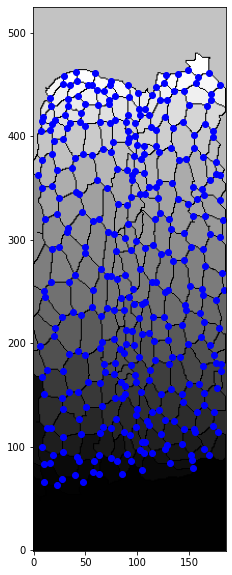

In [291]:
plt.figure(figsize=(10,10))
plt.imshow(seg, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(df_vertices2['y_0'], df_vertices2['x_0'], color='b')

In [292]:
#Création d'un DataFrame de jonctions

init = np.zeros((1,8))
df4_jonctions = pd.DataFrame(columns=['Cell1','Cell2','x0','y0',
                                       'x1','y1',
                                       'angle', 'lenght'])


for ind in range (0, df_vertices2.shape[0]): #pour chaque vertex
    print(ind)
    
    
    cells_ind = np.array([df_vertices2['Cell_1'][ind], 
                              df_vertices2['Cell_2'][ind], 
                              df_vertices2['Cell_3'][ind],
                              df_vertices2['Cell_4'][ind],
                              df_vertices2['Cell_5'][ind]])
        
    for i in range (ind+1, df_vertices2.shape[0]): # pour chaque autre vertex
    
    
        cells_i = np.array([df_vertices2['Cell_1'][i], 
                                df_vertices2['Cell_2'][i], 
                                df_vertices2['Cell_3'][i], 
                                df_vertices2['Cell_4'][i],
                                df_vertices2['Cell_5'][i]])
        
        mask_TrueFalse = np.isin(cells_ind, cells_i)
        
        if np.isin(1., cells_ind):
        
            if np.sum(mask_TrueFalse) == 3 :
   
    
                dict_jonctions={'Cell1': cells_ind[np.where(mask_TrueFalse)][0],
                    'Cell2': cells_ind[np.where(mask_TrueFalse)][1],
                    'x0' : df_vertices2['x_0'][i],
                    'y0' : df_vertices2['y_0'][i],
                    'x1' : df_vertices2['x_0'][ind],
                    'y1' : df_vertices2['y_0'][ind],
                    'angle' : (np.arctan((df_vertices2['y_0'][ind]-df_vertices2['y_0'][i])
                                        /(df_vertices2['x_0'][ind]-df_vertices2['x_0'][i])))*180/np.pi,
                    'lenght' : ((df_vertices2['y_0'][ind]-df_vertices2['y_0'][i])
                                        /(df_vertices2['x_0'][ind]-df_vertices2['x_0'][i]))
                   
                   }

                df4_jonctions=df4_jonctions.append(dict_jonctions, ignore_index = True)
        
        else:
            
            if np.sum(mask_TrueFalse) >= 2 :
   
    
                dict_jonctions={'Cell1': cells_ind[np.where(mask_TrueFalse)][0],
                    'Cell2': cells_ind[np.where(mask_TrueFalse)][1],
                    'x0' : df_vertices2['x_0'][i],
                    'y0' : df_vertices2['y_0'][i],
                    'x1' : df_vertices2['x_0'][ind],
                    'y1' : df_vertices2['y_0'][ind],
                    'angle' : (np.arctan((df_vertices2['y_0'][ind]-df_vertices2['y_0'][i])
                                        /(df_vertices2['x_0'][ind]-df_vertices2['x_0'][i])))*180/np.pi,
                    'lenght' : ((df_vertices2['y_0'][ind]-df_vertices2['y_0'][i])
                                        /(df_vertices2['x_0'][ind]-df_vertices2['x_0'][i]))
                   
                   }

                df4_jonctions=df4_jonctions.append(dict_jonctions, ignore_index = True)
            



0
1
2
3
4
5
6
7
8
9
10
11
12
13


/home/tmerle/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
/home/tmerle/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in double_scalars


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
28

In [293]:
df4_jonctions

Cell1  Cell2     x0     y0     x1     y1      angle     lenght
0      3.0    9.0   73.0   40.0   69.0   27.0  72.897271   3.250000
1      4.0    9.0   84.0   16.0   69.0   27.0 -36.253838  -0.733333
2      7.0    9.0   86.0   44.0   73.0   40.0  17.102729   0.307692
3      4.0   14.0   84.0   16.0   83.0   10.0  80.537678   6.000000
4      2.0   14.0  100.0    8.0   83.0   10.0  -6.709837  -0.117647
5      9.0   14.0   92.0   19.0   84.0   16.0  20.556045   0.375000
6      8.0   15.0   94.0  114.0   84.0  132.0 -60.945396  -1.800000
7     13.0   15.0   98.0  127.0   84.0  132.0 -19.653824  -0.357143
8      7.0   16.0   86.0   58.0   86.0   44.0 -90.000000       -inf
9      9.0   16.0   90.0   42.0   86.0   44.0 -26.565051  -0.500000
10    10.0   16.0   92.0   63.0   86.0   58.0  39.805571   0.833333
11     5.0   17.0   89.0   75.0   86.0   81.0 -63.434949  -2.000000
12    11.0   17.0   93.0   90.0   86.0   81.0  52.125016   1.285714
13     5.0   21.0   92.0   63.0   89.0   75.0 -75.963757  -4.000000
14    17.0   21.0  118.0   75.0   89.0   75.0  -0.000000  -0.000000
15     9.0   22.0   95.0   28.0   90.0   42.0 -70.346176  -2.800000
16    16.0   22.0  112.0   46.0   90.0   42.0  10.304846   0.181818
17    16.0   21.0  113.0   64.0   92.0   63.0   2.726311   0.047619
18     9.0   23.0   95.0   28.0   92.0   19.0  71.565051   3.000000
19    14.0   23.0  100.0    8.0   92.0   19.0 -53.972627  -1.375000
20    19.0   24.0   98.0  165.0   92.0  152.0  65.224859   2.166667
21    13.0   24.0  103.0  143.0   92.0  152.0 -39.289407  -0.818182
22    12.0   17.0  114.0   87.0   93.0   90.0  -8.130102  -0.142857
23     8.0   26.0   94.0  114.0   94.0  107.0 -90.000000       -inf
24    12.0   26.0   97.0  103.0   94.0  107.0 -53.130102  -1.333333
25    15.0   27.0   98.0  127.0   94.0  114.0  72.897271   3.250000
26    26.0   27.0  105.0  108.0   94.0  114.0 -28.610460  -0.545455
27    22.0   23.0  109.0   28.0   95.0   28.0  -0.000000  -0.000000
28    26.0   28.0  105.0  105.0   97.0  103.0  14.036243   0.250000
29    12.0   28.0  111.0   93.0   97.0  103.0 -35.537678  -0.714286
30    13.0   27.0  102.0  129.0   98.0  127.0  26.565051   0.500000
31    24.0   25.0  114.0  156.0   98.0  165.0 -29.357754  -0.562500
32     2.0   23.0  118.0   13.0  100.0    8.0  15.524111   0.277778
33    13.0   29.0  103.0  143.0  102.0  129.0  85.914383  14.000000
34    27.0   29.0  112.0  123.0  102.0  129.0 -30.963757  -0.600000
35    24.0   29.0  117.0  145.0  103.0  143.0   8.130102   0.142857
36    26.0   30.0  105.0  108.0  105.0  105.0 -90.000000       -inf
37    28.0   30.0  119.0   99.0  105.0  105.0 -23.198591  -0.428571
38    27.0   30.0  121.0  111.0  105.0  108.0  10.619655   0.187500
39    22.0   31.0  112.0   46.0  109.0   28.0  80.537678   6.000000
40    23.0   31.0  118.0   17.0  109.0   28.0 -50.710593  -1.222222
41    16.0   32.0  113.0   64.0  112.0   46.0  86.820170  18.000000
42    31.0   32.0  127.0   44.0  112.0   46.0  -7.594643  -0.133333
43    12.0   33.0  114.0   87.0  111.0   93.0 -63.434949  -2.000000
44    28.0   33.0  119.0   99.0  111.0   93.0  36.869898   0.750000
45    27.0   34.0  121.0  111.0  112.0  123.0 -53.130102  -1.333333
46    29.0   34.0  126.0  127.0  112.0  123.0  15.945396   0.285714
47    21.0   32.0  119.0   67.0  113.0   64.0  26.565051   0.500000
48    17.0   33.0  127.0   80.0  114.0   87.0 -28.300756  -0.538462
49    24.0   35.0  117.0  155.0  114.0  156.0 -18.434949  -0.333333
50    25.0   35.0  120.0  173.0  114.0  156.0  70.559965   2.833333
51    25.0   36.0  120.0  173.0  114.0  178.0 -39.805571  -0.833333
52    24.0   37.0  117.0  155.0  117.0  145.0 -90.000000       -inf
53    29.0   37.0  125.0  136.0  117.0  145.0 -48.366461  -1.125000
54    35.0   37.0  134.0  158.0  117.0  155.0  10.007980   0.176471
55    23.0   38.0  118.0   17.0  118.0   13.0 -90.000000       -inf
56     2.0   38.0  151.0   10.0  118.0   13.0  -5.194429  -0.090909
57    31.0   38.0  136.0   28.0  118.0   17.0  31.429566   0.

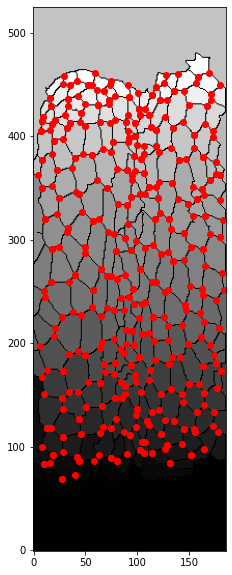

In [294]:
plt.figure(figsize=(10,10))
plt.imshow(seg, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(df4_jonctions['y1'], df4_jonctions['x1'], color='r')

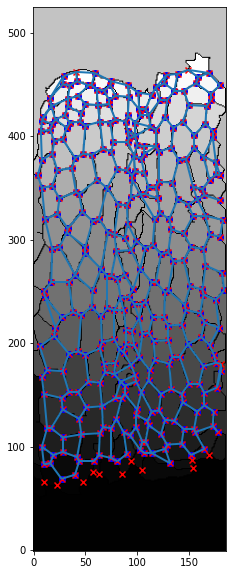

In [295]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines=[]
for i in range (0, df4_jonctions.shape[0]) :
    lines.append(([(df4_jonctions['y0'][i],df4_jonctions['x0'][i]),
                   (df4_jonctions['y1'][i],df4_jonctions['x1'][i])]))



cc = df4_jonctions['x0']
lc = mc.LineCollection(lines, cc, cmap='plasma_r', linewidth=2, alpha=1)

fig, ax = pl.subplots(figsize=(10,10))
ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.1)
#ax.scatter(x,y,color='r', zorder=10, s = 7)
ax.set_aspect('equal')

#plt.imshow(image, origin='lower')

plt.imshow(seg, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(df4_jonctions['y1'], df4_jonctions['x1'], color='b')
plt.scatter(df_vertices2['y_0'], df_vertices2['x_0'], color='r', marker='x')

In [304]:
offset= 0

df4_jonctions_verticales1 = df4_jonctions.loc[df4_jonctions['angle'] <= -45 + offset] 
df4_jonctions_verticales2 = df4_jonctions.loc[df4_jonctions['angle'] >= 45 + offset] 
df4_jonctions_verticales = pd.concat([df4_jonctions_verticales1, df4_jonctions_verticales2])

df4_jonctions_horizontales = df4_jonctions.loc[(df4_jonctions['angle'] > -45+ offset)&(df4_jonctions['angle']< 45 + offset)] 


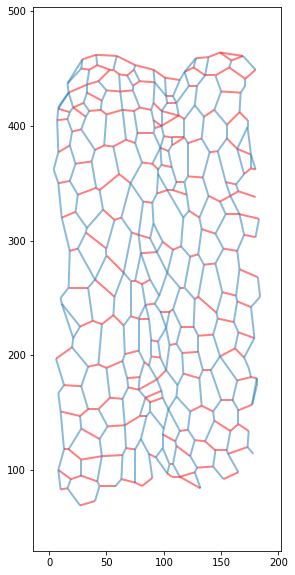

In [305]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
    
lines2=[]
for i in df4_jonctions_horizontales.index :
    lines2.append(([(df4_jonctions_horizontales['y0'][i],df4_jonctions_horizontales['x0'][i]),
                   (df4_jonctions_horizontales['y1'][i],df4_jonctions_horizontales['x1'][i])]))


lines=[]
for i in df4_jonctions_verticales.index :
    lines.append(([(df4_jonctions_verticales['y0'][i],df4_jonctions_verticales['x0'][i]),
                   (df4_jonctions_verticales['y1'][i],df4_jonctions_verticales['x1'][i])]))



cc1 = df4_jonctions['x0']
cc2 = df4_jonctions['y0']

lc1 = mc.LineCollection(lines, cc1, colors = 'r', linewidth=2, alpha=0.5)
lc2 = mc.LineCollection(lines2, cc2, cmap='magma', linewidth=2, alpha=0.5)

fig, ax = pl.subplots(figsize=(10,10))
ax.add_collection(lc1)
ax.add_collection(lc2)
ax.set_aspect('equal')
ax.margins(0.1)
#plt.scatter(x,y,color='r', zorder=10, s = 7)

# Vertices méthode Vladimir


In [54]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
##########
nbCell = len(df_alphacat)
N = 2
##########


#Création d'un dictionnaire contenant les jonctions du périmètre d'une cellule i (key = i ; value = array)
junction_around_cell_dict = {}



import cv2

for i in range (0, nbCell):
    junction_around_cell_dict[i]=junction_around_cell(mask, seg, i)
                          


<IPython.core.display.Javascript object>


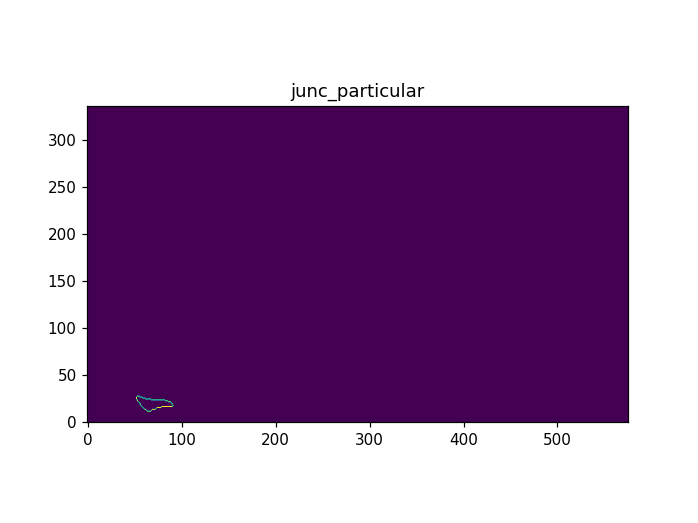

Text(0.5, 1.0, 'junc_particular')

In [56]:

plt.figure()
plt.imshow(junction_around_cell_dict[3], origin='lower')
plt.title('junc_particular')

In [57]:
from scipy import stats as sc

#Création de 2 listes contenant les indices i des périmètres des cellules à comparer
a = []
b = []

for i in range (2, nbCell):
    for j in range (i+1, nbCell):
        a.append(i)
        b.append(j)  


#Création d'un dictionnaire ne contenant que le produit non nul 
#du périmètre de 2 cellules différentes (key = a,b ; value = array)

shared_junction_dict = {}



for i in range(0, len(a)):
    if np.array_equal(junction_around_cell_dict[a[i]]*junction_around_cell_dict[b[i]], np.zeros_like(seg)) == False :
        shared_junction_dict[a[i], b[i]]=junction_around_cell_dict[a[i]]*junction_around_cell_dict[b[i]]


#Récupération des indices des cellules ayant une jonction en commun
m = []
n = []

for k in shared_junction_dict.keys():
    m.append(k[0])
    n.append(k[1])
        
#Création d'un DataFrame
init = np.zeros((len(shared_junction_dict), 6))
df1 = pd.DataFrame(data=init, columns=['cellule a','cellule b','longueur','meanJunc','stdJunc','semJunc'])    
    
for ind,i in enumerate (shared_junction_dict.keys()):
    
    shared_junction_dict_dilated = dilation(shared_junction_dict[i], 1)
    shared_junction_dict_dilated[np.where(shared_junction_dict_dilated != 0)] = 1
    
    df1['cellule a'][ind] = m[ind]
    df1['cellule b'][ind] = n[ind]
    df1['longueur'][ind] = len(np.where(shared_junction_dict[i] == 1)[0])
    df1['meanJunc'][ind] = np.mean(image[np.where(shared_junction_dict_dilated != 0)])
    df1['stdJunc'][ind] = np.std(image[np.where(shared_junction_dict_dilated != 0)])
    df1['semJunc'][ind] = sc.stats.sem(image[np.where(shared_junction_dict_dilated != 0)])

In [58]:
df1

cellule a  cellule b  longueur      meanJunc      stdJunc     semJunc
0          2.0        3.0      18.0   6732.528571  4565.703234  549.646079
1          2.0        6.0      19.0  11427.720000  3659.169788  425.369848
2          3.0        6.0       8.0   6797.447368  4952.448170  814.177464
3          3.0       12.0      32.0   3441.428571  1758.921635  166.949453
4          3.0       15.0       1.0   6934.000000  1436.530775  507.890326
..         ...        ...       ...           ...          ...         ...
317      143.0      145.0       3.0   7780.466667  3644.221561  973.959180
318      143.0      149.0       8.0   7262.000000  3328.262709  400.675745
319      144.0      146.0      12.0   8196.439024  5030.404620  558.933847
320      145.0      149.0      15.0   7729.029851  4872.584453  599.773685
321      147.0      148.0      13.0   4806.340426  2908.849566  428.886470

[322 rows x 6 columns]

In [59]:
shared_junction_dict

{(2,
  3): array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (2,
  6): array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (3,
  6): array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (3,
  12): array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (3,
  15): array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

<IPython.core.display.Javascript object>


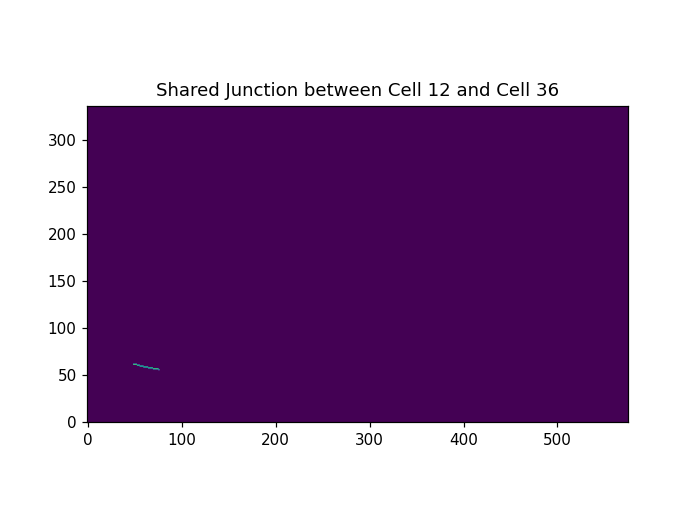

Text(0.5, 1.0, 'Shared Junction between Cell 12 and Cell 36')

In [60]:
plt.figure()
plt.imshow(shared_junction_dict[12,36], origin='lower')
plt.title('Shared Junction between Cell 12 and Cell 36')

In [61]:
df1_Cell2 = df1['cellule a'] == 2

In [62]:
df1_Cell2 

0       True
1       True
2      False
3      False
4      False
       ...  
317    False
318    False
319    False
320    False
321    False
Name: cellule a, Length: 322, dtype: bool

In [74]:

##########
seg2 = np.copy(seg)
x_max = np.shape(seg2)[1]
y_max = np.shape(seg2)[0]
##########


#Création d'un dictionnaire contenant les pixels ayant autour d'eux (dans un rayon de 2 pixels) 
#au moins 3 pixels possédant une valeur différente (key = x,y ; value = numéros cellules)
vertex_dict1 = {}

for x in range (0,x_max):
    for y in range (0,y_max):
        if seg2[y,x] == 0 :
            comp = [0]
            for a in range (x-2, x+2):
                for b in range (y-2, y+2):
                    if 0 < a < x_max and 0 < b < y_max :
                        i = 1
                        for k in range (0,len(comp)):
                            if seg2[b,a] == comp[k]:
                                i = 0
                        if i == 1 :
                            comp.append(seg2[b,a])
            if len(comp) >= 4 :
                vertex_dict1[x,y] = comp           

                #Récupération des coordonnées x et y des vertex
x=[]
y=[]

for k in vertex_dict1.keys():
    x.append(k[0])
    y.append(k[1])

<IPython.core.display.Javascript object>


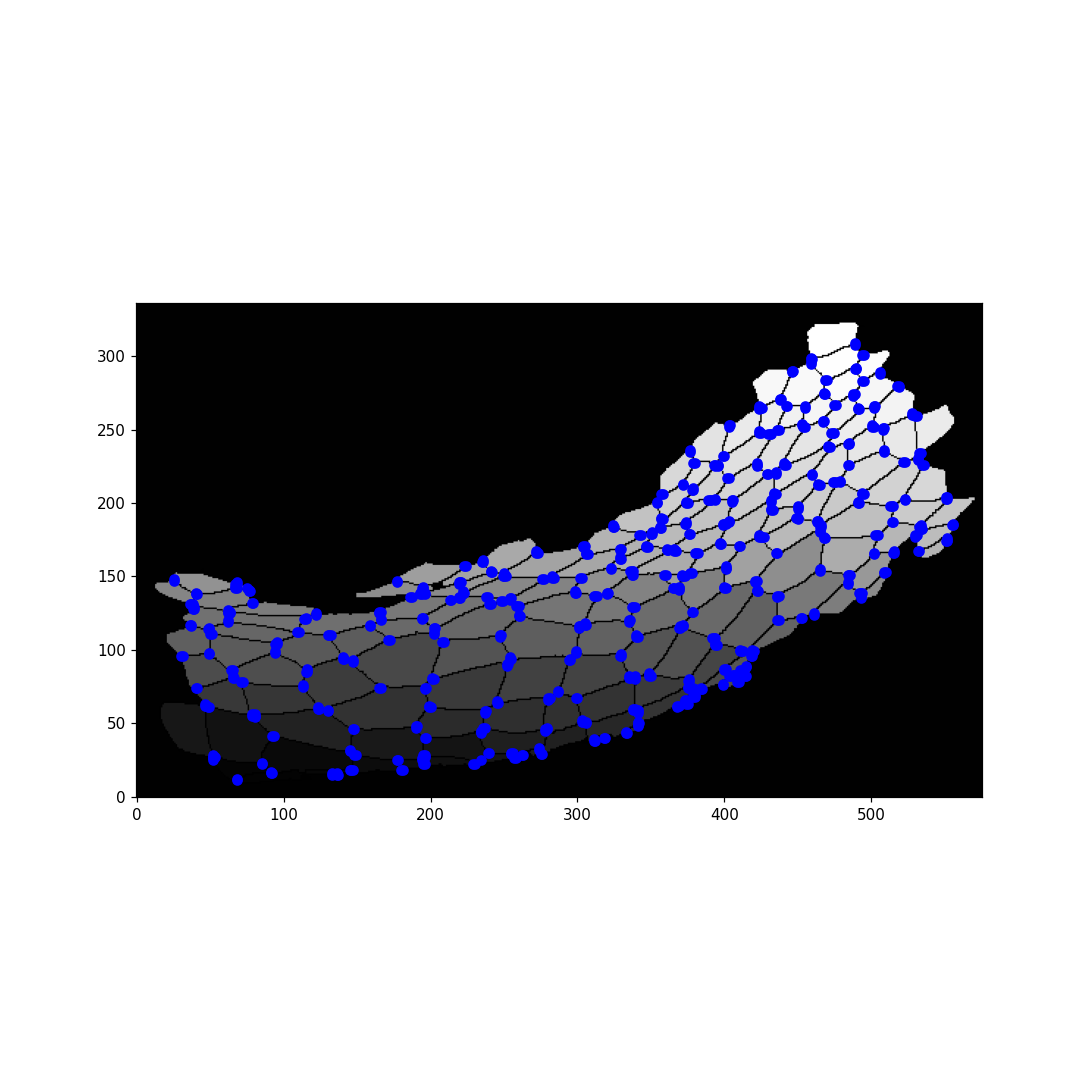

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(seg, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(x, y, color='b')

<IPython.core.display.Javascript object>


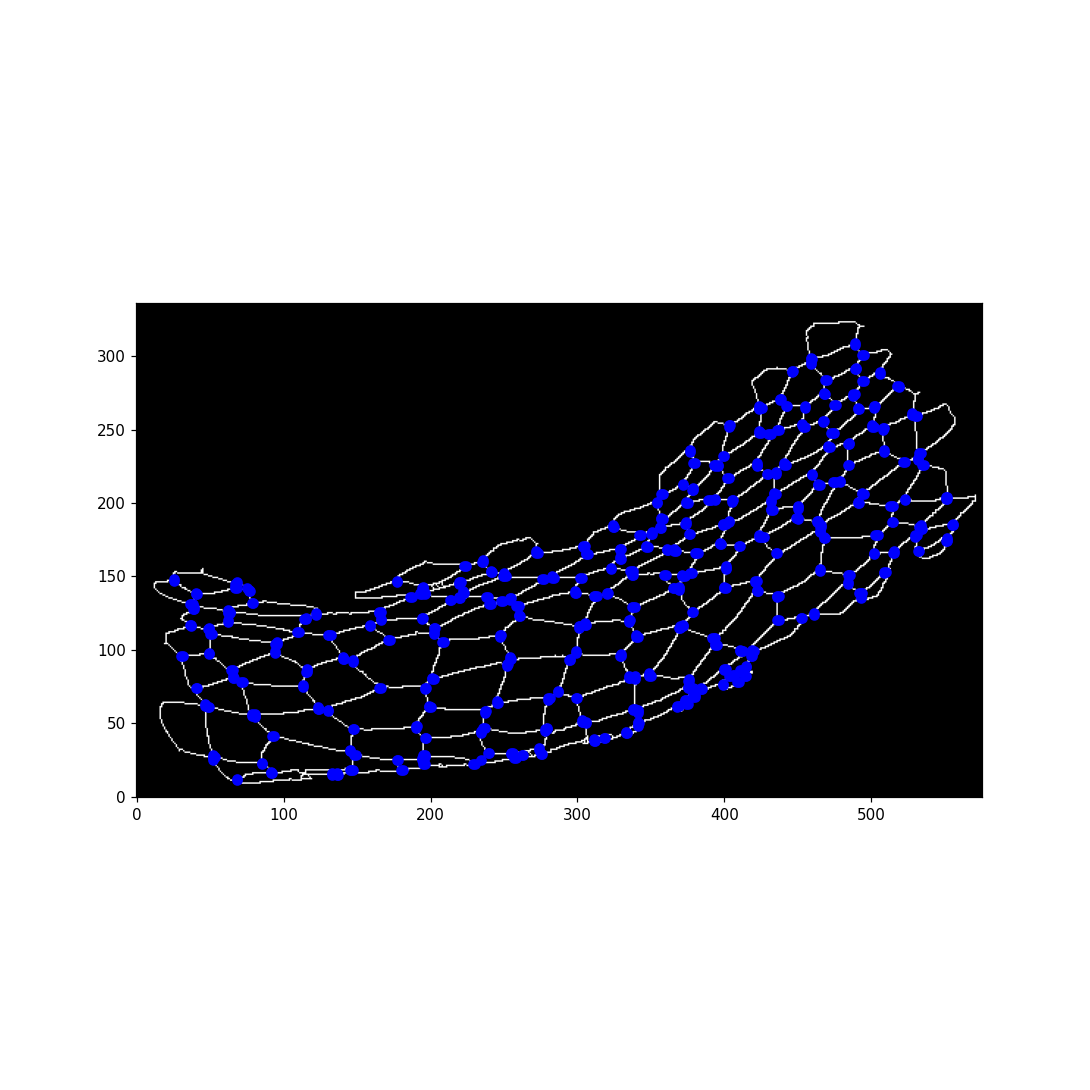

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(mask, origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
#plt.scatter(u, v, color='r')
plt.scatter(x, y, color='b')
#plt.scatter(z, t, color='g')

In [77]:
%matplotlib notebook

In [78]:
len(vertex_dict1)

747

In [79]:

#Récupération des numéros de cellules partageant un vertex
m = []
n = []
o = []
p = []

for k in vertex_dict1.values():
    m.append(k[1])
    n.append(k[2])
    o.append(k[3])
    if len(k)>4 :
        p.append(k[4])
    else :
        p.append('Nan')
        


for k in shared_junction_dict.keys():
    m.append(k[0])
    n.append(k[1])

#Création d'un DataFrame
init = np.zeros((len(vertex_dict1), 5))
df2 = pd.DataFrame(data=init, columns=['cellule a','cellule b','cellule c',
                                       'coordonnée x','coordonnée y'])
    
for ind in range (0, len(vertex_dict1)):
    
    df2['cellule a'][ind] = m[ind]
    df2['cellule b'][ind] = n[ind]
    df2['cellule c'][ind] = o[ind]
    df2['coordonnée x'][ind] = x[ind]
    df2['coordonnée y'][ind] = y[ind]

 

In [80]:
# Moyennisation / nettoyage des vertex :

In [81]:
Mounia Lagha #Création d'un dictionnaire contenant les moyennes des coordonnées des vertex voisins (key = x,y ; value = numéros cellules)
vertex_moy = {}

for clé, valeur in vertex_dict1.items() :
    valeur.sort()
    vertex_dict1[clé] = valeur


val_list = []
for i in vertex_dict1.values() :
    if i not in val_list :
        val_list.append(i)
for i in range (0, len(val_list)) :
    key_list = []
    for clé, valeur in vertex_dict1.items() :
        if valeur == val_list[i]:
            key_list.append(clé)

    list_x = []
    list_y = []
    for j in key_list :
        list_x.append(j[0])
        list_y.append(j[1])

    x_moy = round(sum(list_x)/len(list_x))
    y_moy = round(sum(list_y)/len(list_y))

    vertex_moy[x_moy,y_moy] = val_list[i]

#Récupération des coordonnées x et y des vertex
x=[]
y=[]

for k in vertex_moy.keys():
    x.append(k[0])
    y.append(k[1])

SyntaxError: invalid syntax (<ipython-input-81-a523c1a26ee7>, line 1)

<IPython.core.display.Javascript object>


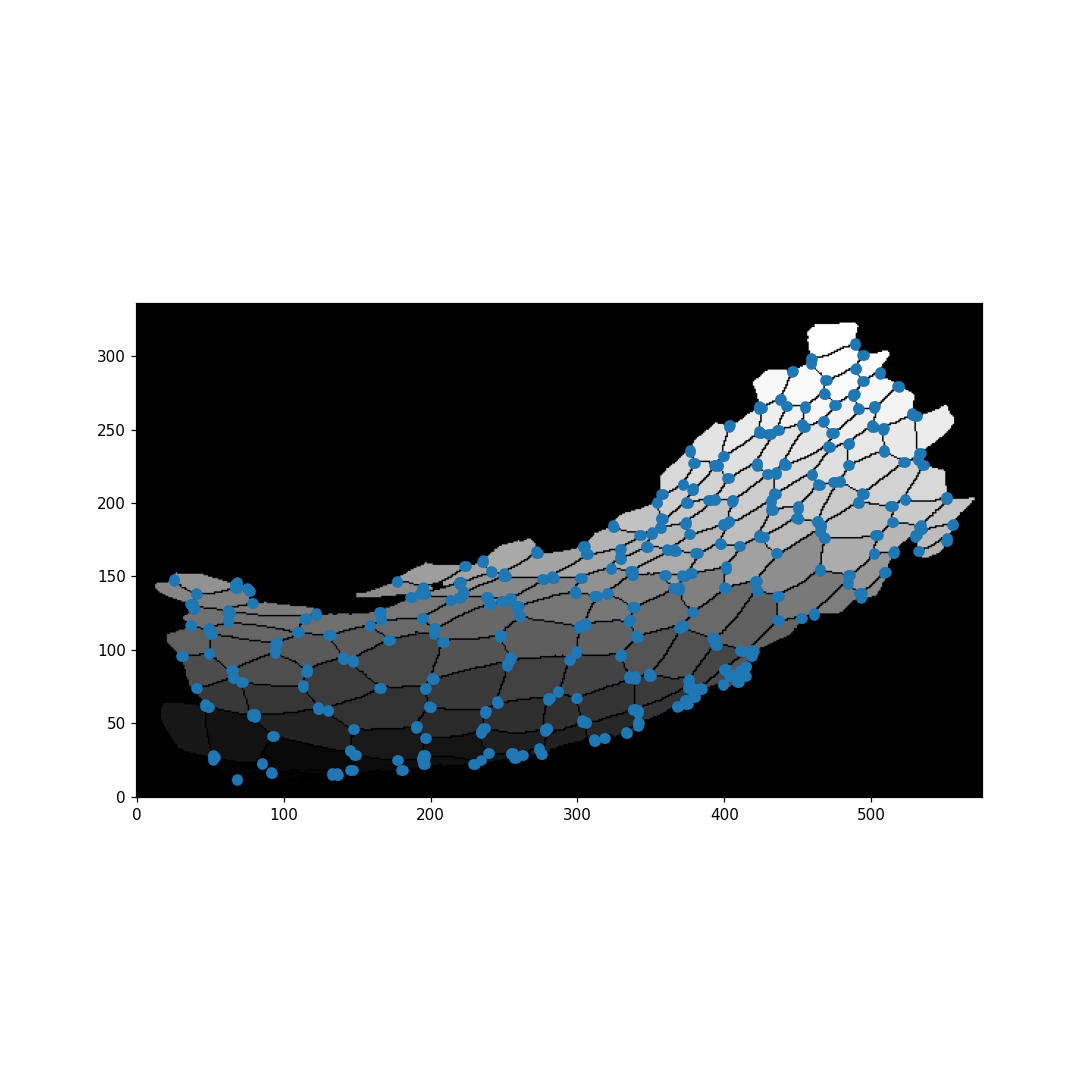

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(seg,origin='lower',cmap='gist_gray')
ax.set_aspect('equal')
plt.scatter(x, y)
#plt.scatter(u, v, color='r', alpha=0.5)


<IPython.core.display.Javascript object>


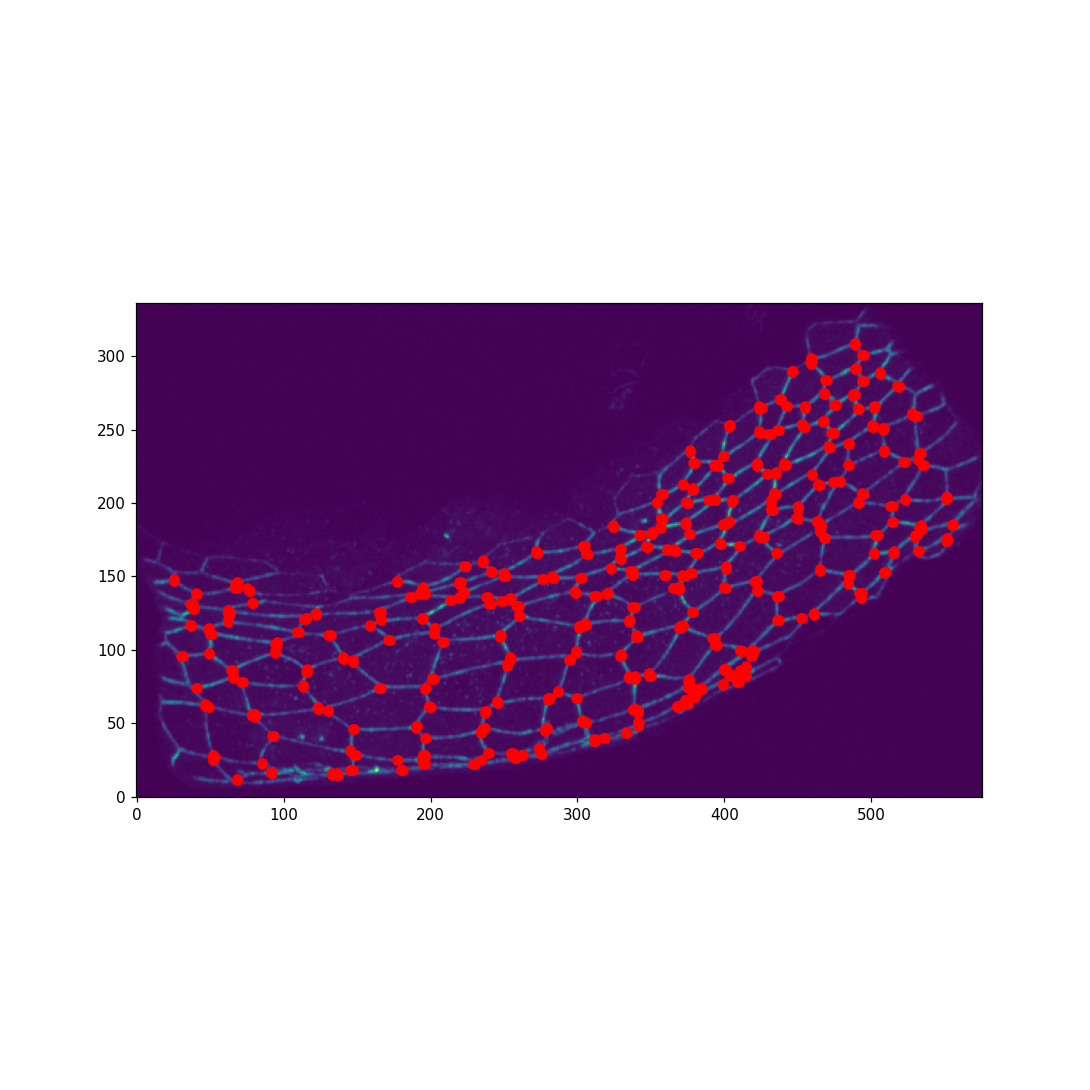

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(image, origin='lower')

ax.set_aspect('equal')
plt.scatter(x, y, color='r')
#plt.scatter(u, v, color='r', alpha=0.5)

In [84]:

# import the required library 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
  
  
# read the image 
#img = cv2.imread('corner1.png') 
  
# convert image to gray scale image 
gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 
  
# detect corners with the goodFeaturesToTrack function. 
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.int0(corners) 
  
# we iterate through each corner,  
# making a circle at each point that we think is a corner. 
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(img, (x, y), 3, 255, -1) 
  
plt.imshow(img), plt.show() 









error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = (cv::impl::<unnamed>::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [85]:
#Récupération des numéros de cellules partageant un vertex
m = []
n = []
o = []
p = []


for k in vertex_moy.values():
    m.append(k[1])
    n.append(k[2])
    o.append(k[3])
    if len(k)>4 :
        p.append(k[4])
    else :
        p.append('Nan')
        
    
#Création d'un DataFrame
init = np.zeros((len(vertex_moy), 6))
df3 = pd.DataFrame(data=init, columns=['cellule a','cellule b','cellule c', 'cellule d',
                                       'coordonée x',
                                       'coordonée y'])
for ind in range (0, len(vertex_moy)):
    
    df3['cellule a'][ind] = m[ind]
    df3['cellule b'][ind] = n[ind]
    df3['cellule c'][ind] = o[ind]
    df3['cellule d'][ind] = p[ind]
    df3['coordonée x'][ind] = x[ind]
    df3['coordonée y'][ind] = y[ind]
  
   

NameError: name 'vertex_moy' is not defined

In [125]:
df3

cellule a  cellule b  cellule c  cellule d  coordonée x  coordonée y
0          1.0       85.0       93.0        NaN         25.0        148.0
1          1.0       49.0       61.0        NaN         30.0         96.0
2          1.0       61.0       73.0        NaN         37.0        117.0
3          1.0       81.0       85.0        NaN         37.0        131.0
4          1.0       73.0       81.0        NaN         39.0        128.0
..         ...        ...        ...        ...          ...          ...
288      116.0      120.0      126.0        NaN        534.0        182.0
289        1.0      134.0      137.0        NaN        536.0        226.0
290      126.0      129.0      137.0        NaN        551.0        204.0
291        1.0      126.0      129.0      137.0        552.0        204.0
292        1.0      120.0      126.0        NaN        556.0        185.0

[293 rows x 6 columns]

In [126]:
#Création d'un DataFrame
init = np.zeros((1,7))
df4_jonctions = pd.DataFrame(columns=['Cell1','Cell2','x0','y0',
                                       'x1','y1',
                                       'angle'])


for ind in range (0,df3.shape[0]): #pour chaque vertex
    print(ind)
    if np.isnan(df3['cellule d'][ind]):
        
        cells_ind = np.array([df3['cellule a'][ind], df3['cellule b'][ind], 
                          df3['cellule c'][ind]])
        for i in range (0,df3.shape[0]): # pour chaque autre vertex
    
    
            cells_i = np.array([df3['cellule a'][i], df3['cellule b'][i], 
                            df3['cellule c'][i], df3['cellule d'][i]])
        
            mask_TrueFalse = np.isin(cells_ind, cells_i)
            if np.sum(mask_TrueFalse) == 2 :
   
    
                dict_jonctions={'Cell1': cells_ind[np.where(mask_TrueFalse)][0],
                    'Cell2': cells_ind[np.where(mask_TrueFalse)][1],
                    'x0' : df3['coordonée x'][i],
                    'y0' : df3['coordonée y'][i],
                    'x1' : df3['coordonée x'][ind],
                    'y1' : df3['coordonée y'][ind],
                    'angle' : np.arctan(
        (df3['coordonée y'][ind]-df3['coordonée y'][i])
        /(df3['coordonée x'][ind]-df3['coordonée x'][i])
    )
                   
                   }

                df4_jonctions=df4_jonctions.append(dict_jonctions, ignore_index = True)
            
            
    
    
    
    
        
    else:
    
        cells_ind = np.array([df3['cellule a'][ind], df3['cellule b'][ind], 
                          df3['cellule c'][ind],df3['cellule d'][ind]])
        for i in range (0,df3.shape[0]): # pour chaque autre vertex
    
    
            cells_i = np.array([df3['cellule a'][i], df3['cellule b'][i], 
                            df3['cellule c'][i],df3['cellule d'][i]])
        
            mask_TrueFalse = np.isin(cells_ind, cells_i)
            if np.sum(mask_TrueFalse) == 3 :
   
    
                dict_jonctions={'Cell1': cells_ind[np.where(mask_TrueFalse)][0],
                    'Cell2': cells_ind[np.where(mask_TrueFalse)][1],
                    'x0' : df3['coordonée x'][i],
                    'y0' : df3['coordonée y'][i],
                    'x1' : df3['coordonée x'][ind],
                    'y1' : df3['coordonée y'][ind],
                    'angle' : np.arctan(
        (df3['coordonée y'][ind]-df3['coordonée y'][i])
        /(df3['coordonée x'][ind]-df3['coordonée x'][i])
    )
                   
                   }

                df4_jonctions=df4_jonctions.append(dict_jonctions, ignore_index = True)








0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


/home/tmerle/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/home/tmerle/anaconda3/envs/opencv-env/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
2

In [127]:
df4_jonctions

Cell1  Cell2     x0     y0     x1     y1     angle
0      1.0   85.0   37.0  131.0   25.0  148.0 -0.956133
1     85.0   93.0   40.0  138.0   25.0  148.0 -0.588003
2      1.0   93.0   68.0  145.0   25.0  148.0 -0.069655
3      1.0   61.0   37.0  117.0   30.0   96.0  1.249046
4      1.0   49.0   40.0   74.0   30.0   96.0 -1.144169
..     ...    ...    ...    ...    ...    ...       ...
905  126.0  129.0  551.0  204.0  552.0  204.0  0.000000
906    1.0  120.0  530.0  178.0  556.0  185.0  0.262995
907    1.0  120.0  545.0  172.0  556.0  185.0  0.868539
908  120.0  126.0  534.0  182.0  556.0  185.0  0.135528
909    1.0  126.0  552.0  204.0  556.0  185.0 -1.363300

[910 rows x 7 columns]

<IPython.core.display.Javascript object>


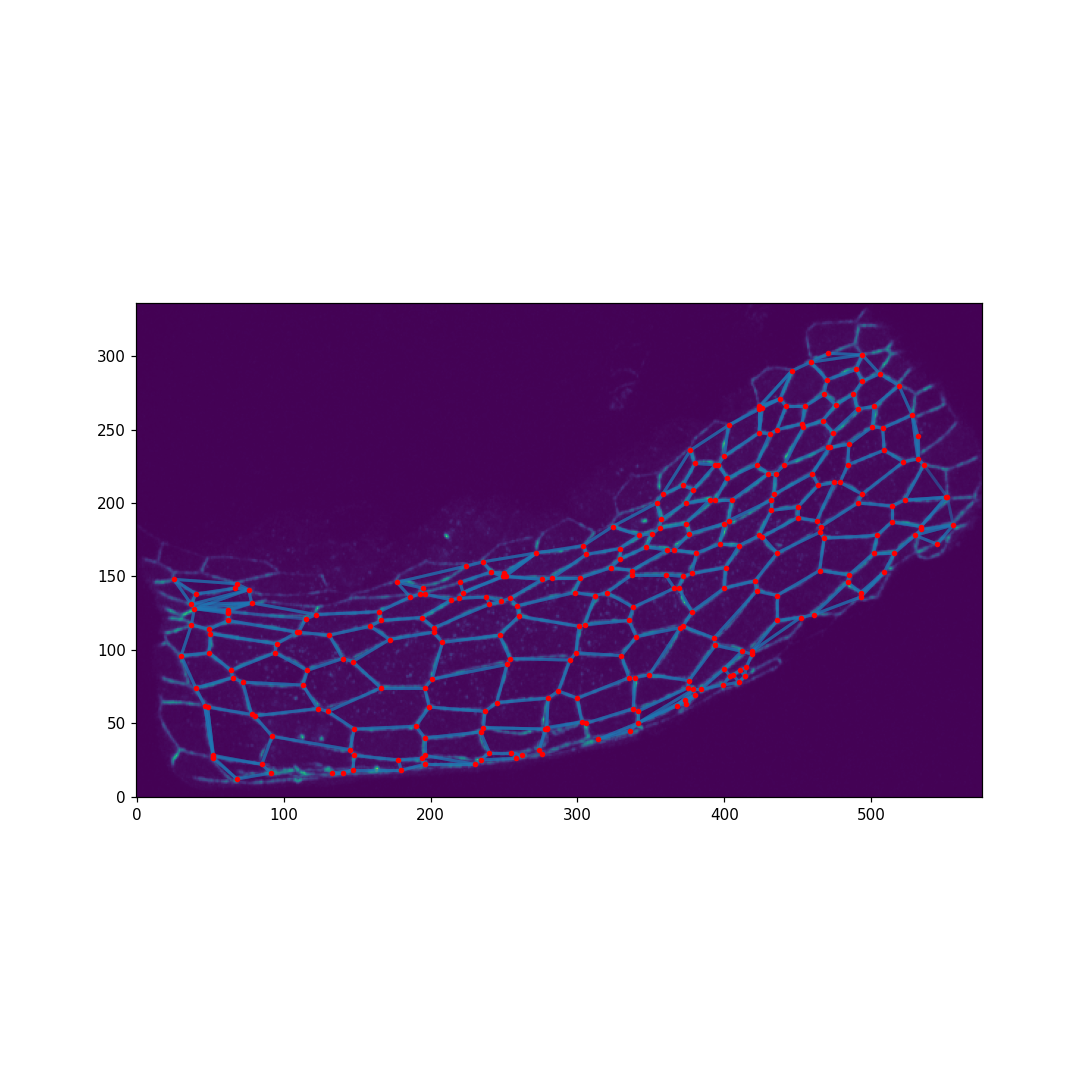

In [128]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines=[]
for i in range (0, df4_jonctions.shape[0]) :
    lines.append(([(df4_jonctions['x0'][i],df4_jonctions['y0'][i]),(df4_jonctions['x1'][i],df4_jonctions['y1'][i])]))




cc = df4_jonctions['x0']
lc = mc.LineCollection(lines, cc, cmap='plasma_r', linewidth=2, alpha=0.5)

fig, ax = pl.subplots(figsize=(10,10))
ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.1)
ax.scatter(x,y,color='r', zorder=10, s = 7)
ax.set_aspect('equal')

plt.imshow(image, origin='lower')

<IPython.core.display.Javascript object>


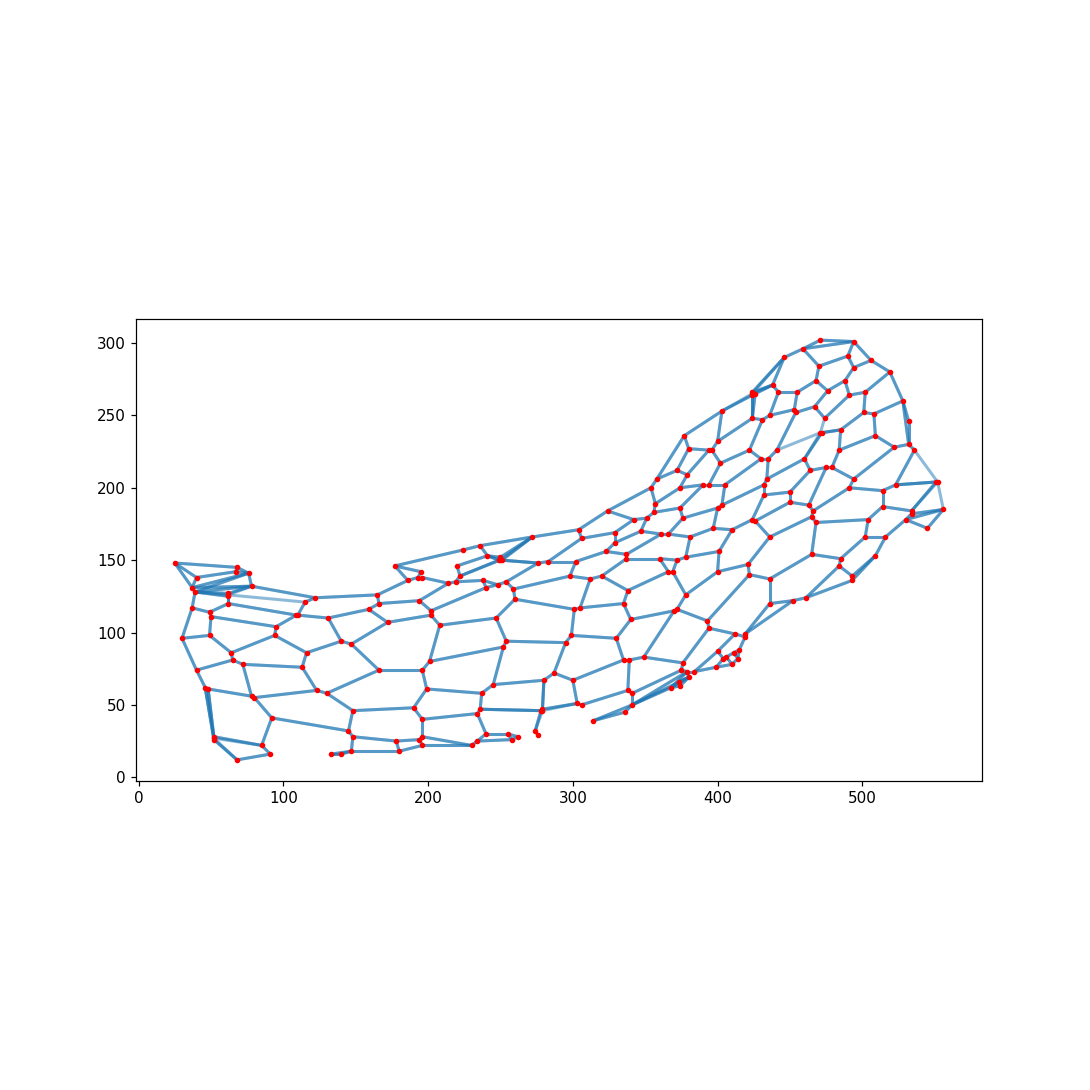

In [129]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines=[]
for i in range (0, df4_jonctions.shape[0]) :
    lines.append(([(df4_jonctions['x0'][i],df4_jonctions['y0'][i]),(df4_jonctions['x1'][i],df4_jonctions['y1'][i])]))




cc = df4_jonctions['x0']
lc = mc.LineCollection(lines, cc, cmap='jet', linewidth=2, alpha=0.5)

fig, ax = pl.subplots(figsize=(10,10))
ax.add_collection(lc)
#ax.autoscale()
#ax.margins(0.1)
ax.scatter(x,y,color='r', zorder=10, s = 7)
ax.set_aspect('equal')

#plt.imshow(image, origin='lower')

# Ellipses

In [298]:
from astropy.modeling import models, fitting
from astropy.modeling.models import Ellipse2D
from astropy.coordinates import Angle
import warnings
%matplotlib inline
# fitting procedure
fit = fitting.SimplexLSQFitter() 
#fit = fitting.LevMarLSQFitter()

In [306]:
seg=segmentation(mask, 10)

In [307]:
from multiprocessing import Pool
from itertools import repeat
import time



def Cell(seg,i):   
    segmentationi = np.zeros_like(seg)
    #for each cell get contour pixels
    segmentationi[np.where(seg == i)] = 1
    return segmentationi

def cellgeoi(inputs):
    ind,i,seg = inputs
    print(i)

    #Ellipse
    imCell = Cell(seg,i)
    # gaussian fit (to estimate x_0, y_0 and theta)
    gi = models.Gaussian2D(amplitude = 1.,
                           x_mean = np.where(imCell==1)[1][int(len(np.where(imCell == 1)[0]) / 2) + 1],
                           y_mean = np.where(imCell == 1)[0][int(len(np.where(imCell == 1)[0]) / 2) + 1], 
                           x_stddev=10, y_stddev=10, theta=0.0) #modèle initial
    
    g1 = fit(gi, x, y, imCell, maxiter=100000) #fit une gaussienne avec les parametres initiaux donnés
    # initial model: fais une ellipse fixe avec les parametres trouvés par le fit gaussien
    
    ei1 = models.Ellipse2D(amplitude=1.,
                           x_0=g1.x_mean, 
                           y_0=g1.y_mean, 
                           a=g1.x_stddev, 
                           b=g1.y_stddev,
                           theta=g1.theta, 
                           fixed={'x_0': True, 'y_0':True, 'theta':True})
    
    #fitted model : on fit une ellipse et donc on change a et b 
    e1 = fit(ei1, x, y, imCell, maxiter=100000)
    e1.amplitude = 1
    z1 = e1(x, y)
    
    if e1.b.value > e1.a.value:
        e1.theta.value = e1.theta.value + np.pi/2 
        c = e1.a.value  
        e1.a.value = e1.b.value 
        e1.b.value = c
    
    return e1


In [308]:
start = time.time()
y, x = np.mgrid[0:np.shape(seg)[0], 0:np.shape(seg)[1]] #grille 
init = np.zeros((len(np.unique(seg)[2:]),5))
Dataframe_geo_para = pd.DataFrame(data=init,columns=['x_0','y_0','a','b','theta'])

all_inputs = zip(range(len(np.unique(seg)[2:])),np.unique(seg)[2:],repeat(seg))

pool = Pool(4)
CellGeo= pool.map_async(cellgeoi, all_inputs)
pool.close()
pool.join()
e1l = CellGeo.get()

for ind,i in enumerate(np.unique(seg)[2:]):
    print(i)
    Dataframe_geo_para['x_0'][ind] = e1l[ind].x_0.value
    Dataframe_geo_para['y_0'][ind] = e1l[ind].y_0.value
    Dataframe_geo_para['a'][ind] = e1l[ind].a.value
    Dataframe_geo_para['b'][ind] = e1l[ind].b.value
    Dataframe_geo_para['theta'][ind] = e1l[ind].theta.value

Dataframe_geo_para['e'] = np.sqrt( 1 - (Dataframe_geo_para['b']**2 / (Dataframe_geo_para['a']**2) ))
Dataframe_geo_para['an'] = Dataframe_geo_para['a'] / Dataframe_geo_para['b']
Dataframe_geo_para['a um'] = Dataframe_geo_para['a'] * pixel_ratio
Dataframe_geo_para['b um'] = Dataframe_geo_para['b'] * pixel_ratio

#Dataframe_geo_para['e'] = np.sqrt( 1 - (Dataframe_geo_para['b']**2 / (Dataframe_geo_para['a']**2) ))
#Dataframe_geo_para['an'] = Dataframe_geo_para['a'] / Dataframe_geo_para['b']

end=time.time()

print('Cell Geo 4 cores ran in ',(end-start)/60.,' min')

32
17
2
46
33
3
47
18
4
48
19
34
5
21
49
35
22
7
36
50
23
37
8
51
38
24
52
39
9
53
25
10
40
54
26
11
41
55
27
42
12
56
28
43
13
57
29
44
14
58
30
45
59
15
60
31
78
16
61
93
79
107
64
94
81
108
95
66
109
82
96
110
83
68
111
97
84
112
69
98
85
70
99
113
86
100
114
71
87
101
115
72
88
102
116
73
117
89
103
74
118
104
90
75
105
119
91
76
106
120
92
77
121
135
149
165
122
150
136
166
123
137
151
168
124
152
138
169
125
170
126
139
153
171
127
140
128
172
154
129
157
141
173
130
158
142
174
131
159
143
132
175
160
144
133
145
134
161
176
146
180
162
177
147
178
163
148
179
164
194
209
224
210
195
225
211
196
226
213
197
227
214
198
228
229
200
215
230
201
216
231
202
217
232
181
203
218
182
233
204
219
183
205
234
220
184
235
206
185
221
207
186
222
208
187
223
188
189
190
191
192
193
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
64
66
68
69
70
71
72
73
74
75
76
77
78
79
8

In [309]:
Dataframe_geo_para2 = Dataframe_geo_para

In [310]:
Dataframe_geo_para = Dataframe_geo_para[Dataframe_geo_para['a'] < 1000]


In [303]:
Dataframe_geo_para

x_0         y_0          a          b     theta         e  \
0      5.421665   60.485392   8.366908   5.751593  1.934516  0.726259   
1     35.804285   62.913181  11.254252   8.283377  0.203839  0.676958   
2     15.926257   72.573049  11.317167   6.823579  2.169288  0.797786   
3     73.566447   78.198326  13.181325   8.369326  2.086646  0.772563   
4     49.623768   78.071827  10.035699   6.547966  1.168180  0.757817   
5      3.887122   75.708094   8.002935   3.668170  1.869122  0.888770   
6    122.241270   77.199858  24.109846   7.546104 -0.115367  0.949757   
7     30.526877   82.232247  12.707585  10.815493 -0.406401  0.524995   
8     61.132980   82.581439   8.050903   3.005034  1.449490  0.927729   
9     87.691622   83.824346   8.831611   5.729272  1.355968  0.761024   
10   101.276083   88.487247   8.135025   4.612077  1.481217  0.823759   
11   143.904968   83.191196   9.975681   4.397137  0.015161  0.897612   
12     1.538185  126.774781  43.734597   4.073273  1.586339  0.995653   
13    11.515401   90.760125   7.841087   5.252451  2.295886  0.742485   
14   122.677098   90.474421   8.917858   5.800279 -0.565923  0.759582   
15    52.987669   99.606815  12.999213   7.683197  1.256193  0.806634   
16    82.323759   98.453118  12.452176   4.924926  1.346211  0.918463   
17   138.401730   94.666099  11.359896   7.384409 -0.239941  0.759898   
18   159.884449   92.726794   8.190157   5.052129  0.385574  0.787078   
19   179.649278   99.328540  13.157202   5.924453  1.402789  0.892886   
20    69.587945  103.869456  14.824668   7.975297  1.461090  0.842961   
21    92.039388  100.644921  11.876071   3.299329  1.835577  0.960635   
22    37.457170  101.874523  10.706681   9.031555  1.117851  0.537060   
23   151.990493  105.546916  11.456009   7.907929  1.874472  0.723536   
24    18.390686  104.248003  11.288983   9.058216  1.945764  0.596794   
25   169.342290  107.903529  11.883981   6.460032  1.317040  0.839350   
26   108.113897   98.676657   5.068950   3.560382  2.159961  0.711792   
27   116.804261  106.599075  12.277321   7.312991  2.189915  0.803244   
28    98.750751  107.027669  10.582491   4.559266  1.779959  0.902433   
29   134.178610  112.961141  10.589679  10.130008  1.939938  0.291429   
30   104.375184  118.052514  11.962364   4.045167  1.765210  0.941089   
31    80.331079  117.281846   8.851264   4.836360  1.519605  0.837522   
32    31.738033  121.103634  13.181598  11.044633  0.204369  0.545850   
33    90.532650  130.057550  18.244348   7.766705  1.658800  0.904862   
34    56.129356  124.402340  13.935317  10.207033  1.143946  0.680812   
35   119.045918  124.235804  11.740651   6.686463  1.893515  0.821982   
36   164.435576  125.886669  13.274086   8.105655  1.208031  0.791910   
37   181.270953  124.165728  11.799392   6.871419  1.752797  0.812936   
38   147.286764  128.004488  11.721557   9.586953  1.730068  0.575374   
39    15.307687  135.381971  14.664389  12.132018  1.377604  0.561743   
40    74.520821  133.566155  14.477542   7.046659  1.147527  0.873552   
41   106.217643  136.764264  11.741675   5.909243  1.667965  0.864129   
42   132.037220  140.307376  14.873388   9.440264  1.440536  0.772752   
43    39.776926  140.618331  12.869584  10.058844  2.153251  0.623782   
44   114.753817  148.237743  13.472984   6.942516  1.882906  0.857015   
45   154.740927  147.968215  13.169743  10.007234  1.773257  0.650080   
46   175.433873  145.286904  11.595962   9.675303  2.227454  0.551207   
47    96.799803  150.379835  10.615757   7.142134  1.663311  0.739837   
48    56.673360  150.048516  12.751388   9.861963  1.693606  0.633915   
49    72.386085  157.131306  14.597350   8.220040  1.456227  0.826376   
50    20.888096  160.503189  14.440874  11.500990  2.020405  0.604745   
51    83.498547  154.815429   7.781075   3.905195  1.573473  0.864935   
52   184.040302  165.581428  17.095340   2.117421  1.588692  0.992300   
53   122.782517  167.636675  15.178856   9.778579  1.728554  0.764837 

In [259]:
from multiprocessing import Pool
import time

In [260]:
Dataframe_geo_para.to_csv('Dataframe_geo_para.csv',index=False)
#Dataframe_geo_para = pd.read_csv('/home/tmerle/Dataframe_geo_para.csv')

In [261]:
np.mean(Dataframe_geo_para['a um'])

2.499694522511031

In [262]:
from matplotlib.colors import LogNorm,PowerNorm

KeyError: 168

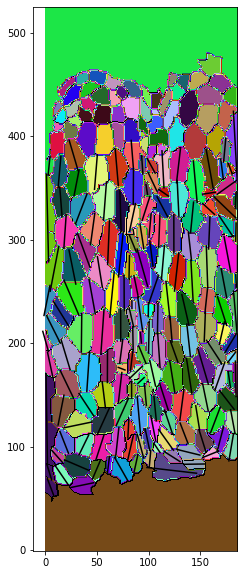

In [265]:
plt.figure(figsize=(10,10))
plt.imshow(seg0,origin='lower',cmap=cmap_rand)
for i in range(len(Dataframe_geo_para)):
    startx = Dataframe_geo_para['x_0'][i] - Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    starty = Dataframe_geo_para['y_0'][i] - Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])
    endx = Dataframe_geo_para['x_0'][i] + Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    endy = Dataframe_geo_para['y_0'][i] + Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])
    
    
    plt.plot([startx, endx], [starty, endy], color='black')

KeyError: 168

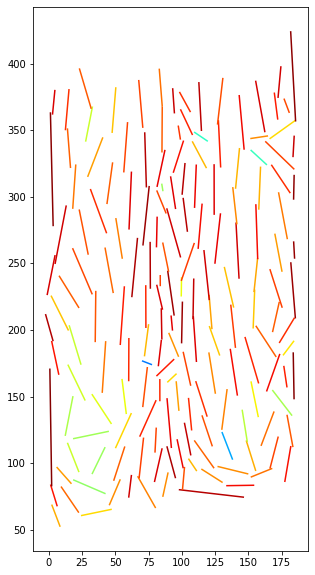

In [264]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
#plt.imshow(seg,origin='lower',cmap=cmap_rand)
for i in range(len(Dataframe_geo_para)):
    startx = Dataframe_geo_para['x_0'][i] - Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    starty = Dataframe_geo_para['y_0'][i] - Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])
    endx = Dataframe_geo_para['x_0'][i] + Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    endy = Dataframe_geo_para['y_0'][i] + Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])

    colori = plt.cm.jet(Dataframe_geo_para['e'][i]) # r is 0 to 1 inclusive
        
    plt.plot([startx, endx], [starty, endy], color=colori)
   
#plt.colorbar(Dataframe_geo_para_bis['e'])

In [244]:
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

In [ ]:
'''Fonction pour la jolie color bar'''

from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [ ]:
%matplotlib notebook

In [ ]:
fig = plt.figure(figsize=(10,9))
ax.set_aspect('equal')
#plt.imshow(seg,origin='lower',cmap='viridis')
plt.imshow(mask,origin='lower',cmap='gist_gray')
xs = []
ys = []
for i in range(len(Dataframe_geo_para)):
    startx = Dataframe_geo_para['x_0'][i] - Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    starty = Dataframe_geo_para['y_0'][i] - Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])
    endx = Dataframe_geo_para['x_0'][i] + Dataframe_geo_para['a'][i] * np.cos(Dataframe_geo_para['theta'][i])
    endy = Dataframe_geo_para['y_0'][i] + Dataframe_geo_para['a'][i] * np.sin(Dataframe_geo_para['theta'][i])
    
    xs.append([startx,endx])
    ys.append([starty,endy])
c = Dataframe_geo_para['an']
lc = multiline(xs, ys, c, cmap='jet', lw=2, clim = (0,8))
add_colorbar(lc, aspect=0.05, pad_fraction=0.5, label = 'Anisotropy (a/b)')